### Description

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

* To predict whether a liability customer will buy a personal loan or not.
* Which variables are most significant.
* Which segment of customers should be targeted more.

### Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Import Libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

pd.set_option(
    "display.max_columns", None
)  # Removes the limit for the number of displayed columns
pd.set_option(
    "display.max_rows", 200
)  # Sets the limit for the number of displayed rows

# libraries to build Logistic Regression
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
)

<IPython.core.display.Javascript object>

In [2]:
# read dataset and check the header
loan = pd.read_csv("Loan_Modelling.csv")
loan.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

<IPython.core.display.Javascript object>

In [3]:
# check the tail
loan.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

<IPython.core.display.Javascript object>

* ID column can be deleted since its a sequence number

In [4]:
loan.drop(columns=["ID"], inplace=True)

<IPython.core.display.Javascript object>

In [5]:
# check the shape
loan.shape

(5000, 13)

<IPython.core.display.Javascript object>

* There are 5000 rows and 13 columns

In [6]:
# check data type
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


<IPython.core.display.Javascript object>

* All the columns are numeric
* There are no null values 

In [7]:
# explore zipcode
loan["ZIPCode"].nunique()

467

<IPython.core.display.Javascript object>

* There are 467 unique zipcodes, which will need to be converted into higher level categoy

In [8]:
loan["Personal_Loan"].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

<IPython.core.display.Javascript object>

* Close to 10% of customer accepted personal loan offer

### Summary of Dataset

In [9]:
loan.describe().T

count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.104600    11.467954     -3.0     10.0   
Income              5000.0     73.774200    46.033729      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.937938     1.747659      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     56.498800   101.713802      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

<IPython.core.display.Javascript object>

* Average age of the customer is 45.38
* Average professional experience is around 20 years, minimum value of experience is negative, will need to explore further
* Average income is 73.77K which is higher than median income of 64K, income is right skewed
* Family seems to be categorical variable with min 1 member and max 4 member
* Average spending on Credit card is 1.94K per month. There are customers with zero Credit card spent
* Education seems to be categorical variable based on definition provided
* Mortgage is again right skewed. There are customers with zero Mortgage. 
* Other variables are categical variable

### Check for missing values

In [10]:
loan.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

### Check for duplicate values

In [11]:
loan.duplicated().sum()

0

<IPython.core.display.Javascript object>

### Check negative experience records

In [12]:
loan[loan["Experience"] < 0].shape

(52, 13)

<IPython.core.display.Javascript object>

* There are 52 customers who have negative experience. In reality, this will not be possible, so lets replace these with zero 

In [13]:
loan[loan["Experience"] < 0].shape

(52, 13)

<IPython.core.display.Javascript object>

In [14]:
# convert negative into zero


def negative_to_zero(exp_val):
    if exp_val < 0:
        return 0
    else:
        return exp_val


loan["Experience"] = loan["Experience"].apply(negative_to_zero)

<IPython.core.display.Javascript object>

In [15]:
loan[loan["Experience"] < 0].shape

(0, 13)

<IPython.core.display.Javascript object>

### convert zipcode into categorical variable

In [16]:
from uszipcode import SearchEngine, SimpleZipcode

<IPython.core.display.Javascript object>

In [17]:
def return_state(zipcode):
    srch = SearchEngine()
    if zipcode == 92717:
        return "CA"
    elif zipcode == 93077:
        return "CA"
    elif zipcode == 92634:
        return "CA"
    elif zipcode == 96651:
        return "UN"
    else:
        z = srch.by_zipcode(str(zipcode))
        return z.state

<IPython.core.display.Javascript object>

In [18]:
loan["State"] = loan["ZIPCode"].apply(return_state)

<IPython.core.display.Javascript object>

In [19]:
loan.State.value_counts()

CA    4994
UN       6
Name: State, dtype: int64

<IPython.core.display.Javascript object>

* Majority of the data belongs to California state, this will not help in our analysis, so I am going to delete this column

In [20]:
loan.drop(columns=["State"], inplace=True)

<IPython.core.display.Javascript object>

In [21]:
def return_county(zipcode):
    srch = SearchEngine()
    if zipcode in [92717, 93077, 92634, 96651]:
        return "unknown"
    else:
        z = srch.by_zipcode(str(zipcode))
        return z.county

<IPython.core.display.Javascript object>

In [22]:
loan["County"] = loan["ZIPCode"].apply(return_county)

<IPython.core.display.Javascript object>

In [23]:
loan.County.nunique()

39

<IPython.core.display.Javascript object>

In [24]:
loan.County.value_counts(normalize=True)

Los Angeles County        0.2190
San Diego County          0.1136
Santa Clara County        0.1126
Alameda County            0.1000
Orange County             0.0678
San Francisco County      0.0514
San Mateo County          0.0408
Sacramento County         0.0368
Santa Barbara County      0.0308
Yolo County               0.0260
Monterey County           0.0256
Ventura County            0.0228
San Bernardino County     0.0202
Contra Costa County       0.0170
Santa Cruz County         0.0136
Riverside County          0.0112
Marin County              0.0108
Kern County               0.0108
unknown                   0.0068
Solano County             0.0066
San Luis Obispo County    0.0066
Humboldt County           0.0064
Sonoma County             0.0056
Fresno County             0.0052
Placer County             0.0048
Butte County              0.0038
Shasta County             0.0036
El Dorado County          0.0034
Stanislaus County         0.0030
San Benito County         0.0028
San Joaqui

<IPython.core.display.Javascript object>

In [25]:
# check top 5 counties and check their percentage
loan.County.value_counts(normalize=True).head(5).sum()

0.613

<IPython.core.display.Javascript object>

* There are 39 unique counties, which is too many for our analysis, as of now, we will keep it, and do EDA and then take a call
* Almost 61.3% of customers belong to top 5 counties (Los Angeles County, San Diego County, Santa Clara County, Alameda County and Orange County)

### Univariate Analysis

In [26]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count, 4))
    else:
        plt.figure(figsize=(n, 4))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [27]:
def histogram_boxplot(data, feature, figsize=(10, 8), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

#### Observation on Personal Loan

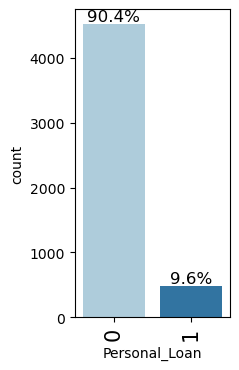

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(loan, "Personal_Loan", perc=True)

* Approximately 10% of customers accepted personal loan

#### Observation on Family

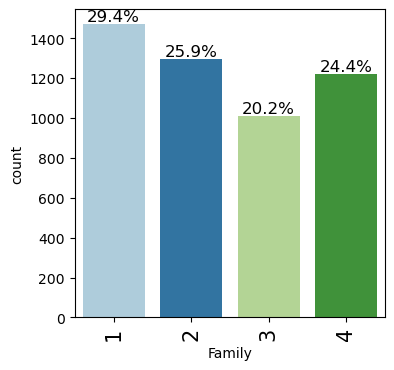

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(loan, "Family", perc=True)

* Majority of customers are single, followed by couples and family of four

#### Observation on Education

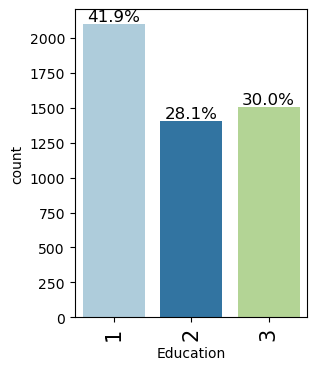

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(loan, "Education", perc=True)

* Majority (41.9%) of customers are undergraduate, followed by Advanced/professional (30%)

#### Observation on Securities Account

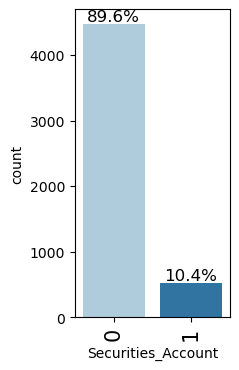

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(loan, "Securities_Account", perc=True)

* Almost 90% of customers do not have security account with the bank

#### Observation on Certificate of Deposit Account

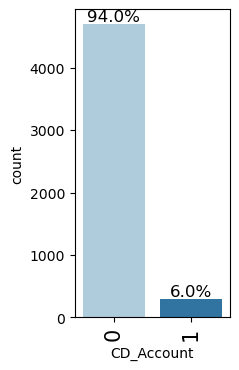

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(loan, "CD_Account", perc=True)

* Almost 94% of customers do not have Certificate of Deposit Account with the bank

#### Observation on Internet Banking Facilities

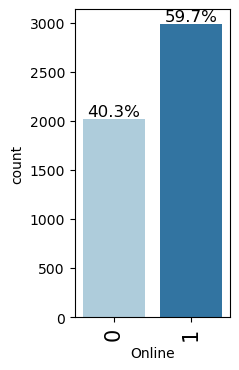

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(loan, "Online", perc=True)

* Almost 60% of the customers use internet banking facilities

#### Observation on Credit Card by other Banks

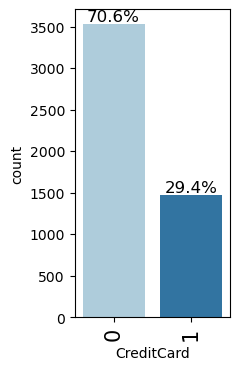

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(loan, "CreditCard", perc=True)

* Almost 29% of the customers use credit card issued by other bank

#### Observation on County

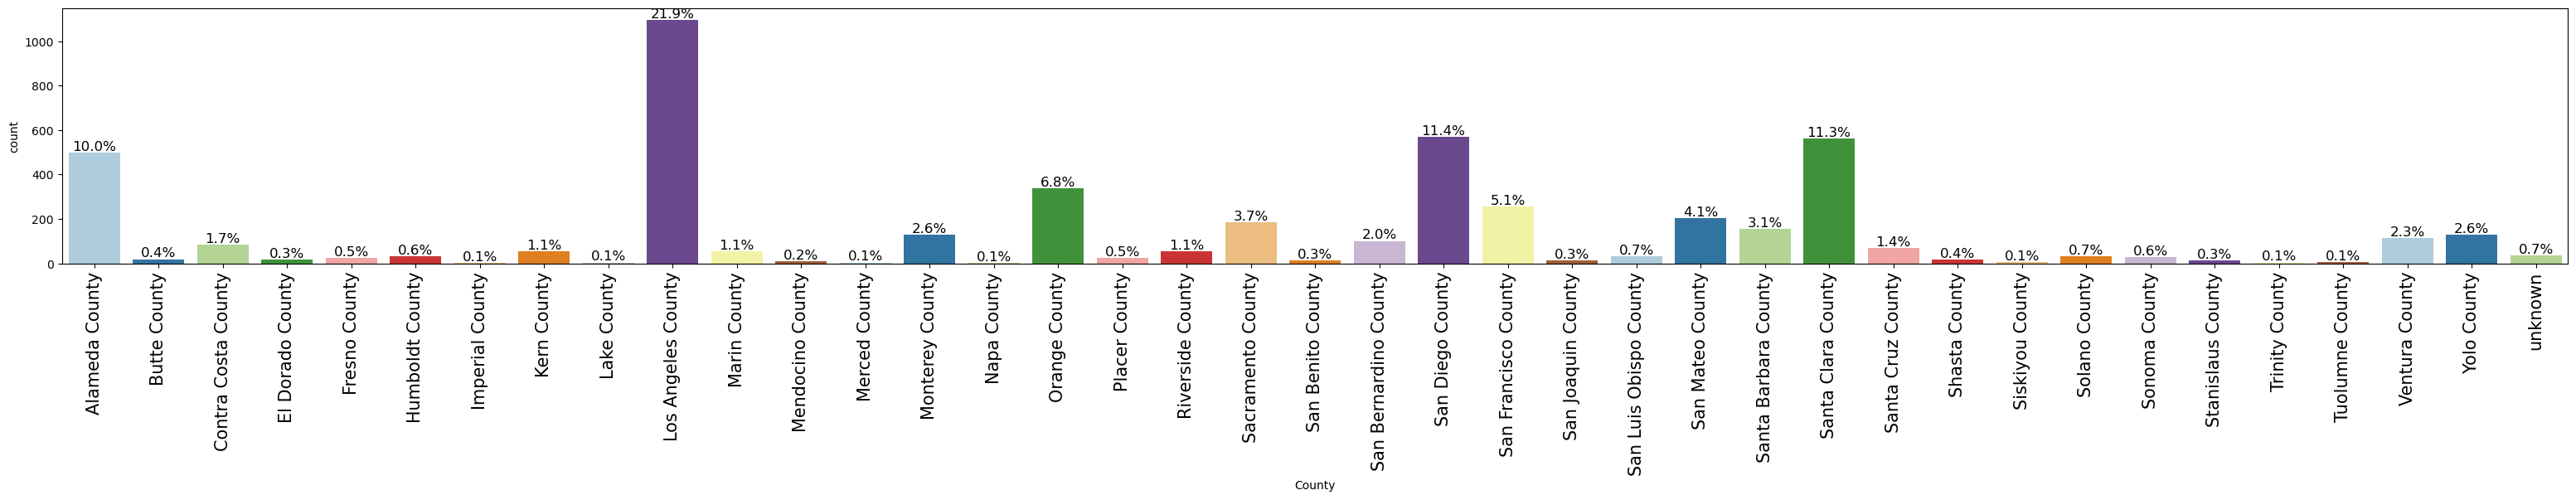

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(loan, "County", perc=True)

* There are around 39 unique counties and top 5 counties have around 61% of customers as we have previously seen

#### Obervation on Age

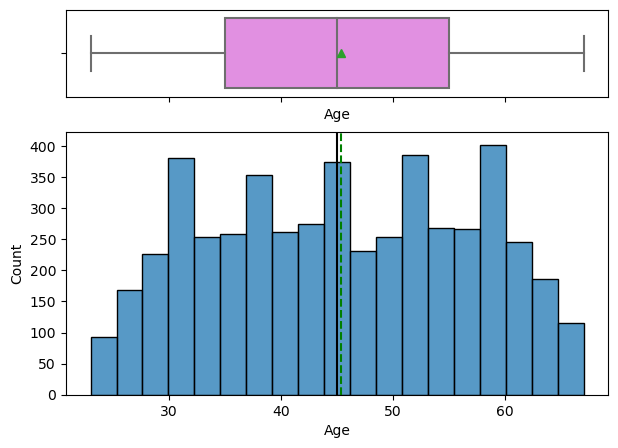

<IPython.core.display.Javascript object>

In [36]:
histogram_boxplot(loan, "Age", (7, 5))

* There is no outlier

#### Obervation on Income

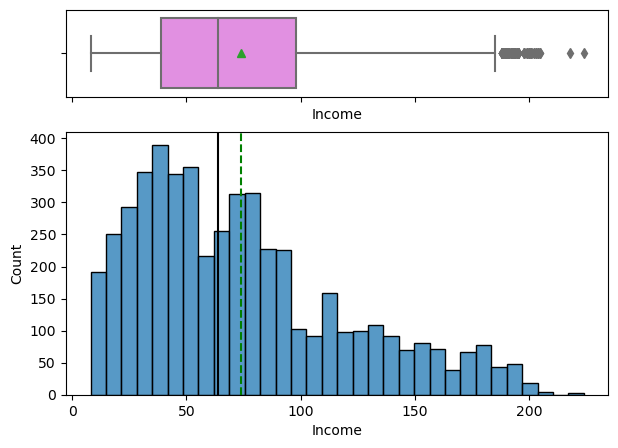

<IPython.core.display.Javascript object>

In [37]:
histogram_boxplot(loan, "Income", (7, 5))

* Income is right skewed with many outliers at the higher income side

#### Obervation on Mortgage

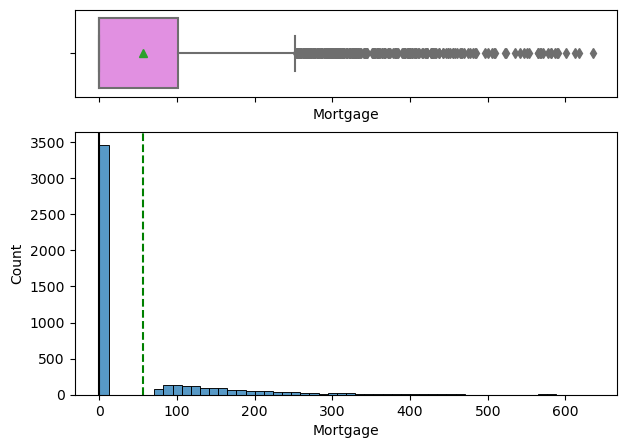

<IPython.core.display.Javascript object>

In [38]:
histogram_boxplot(loan, "Mortgage", (7, 5))

* Looks like there are high number of customers (just less than 3500) who do not have house mortgage
* Data is right skewed with many outliers

#### Obervation on # of years of Professional Experience

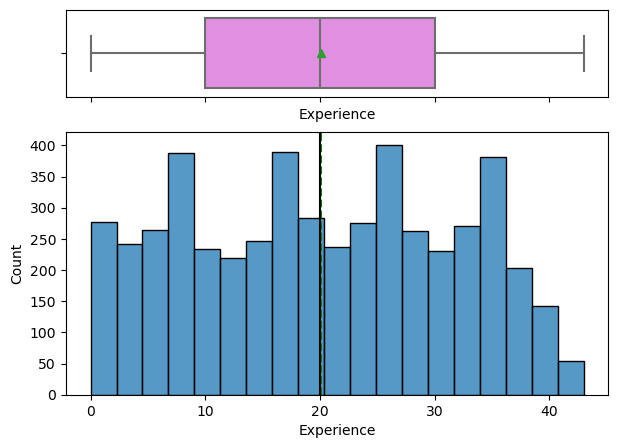

<IPython.core.display.Javascript object>

In [39]:
histogram_boxplot(loan, "Experience", (7, 5))

* There are no outliers

#### Obervation on Average spending on credit cards per month

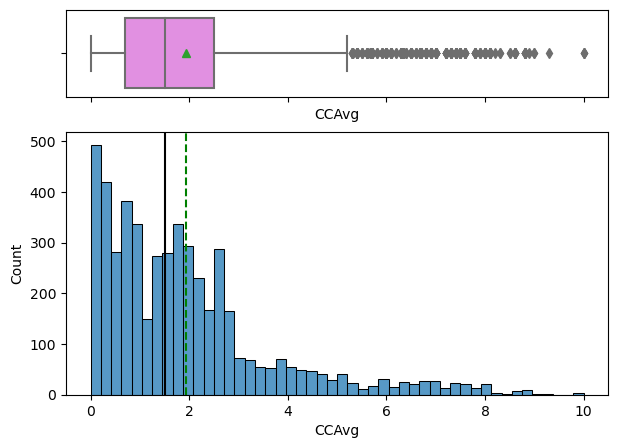

<IPython.core.display.Javascript object>

In [40]:
histogram_boxplot(loan, "CCAvg", (7, 5))

* Data is right skewed with many outliers

### Multivariate Analysis

In [41]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [42]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

#### Target Variable Personal Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


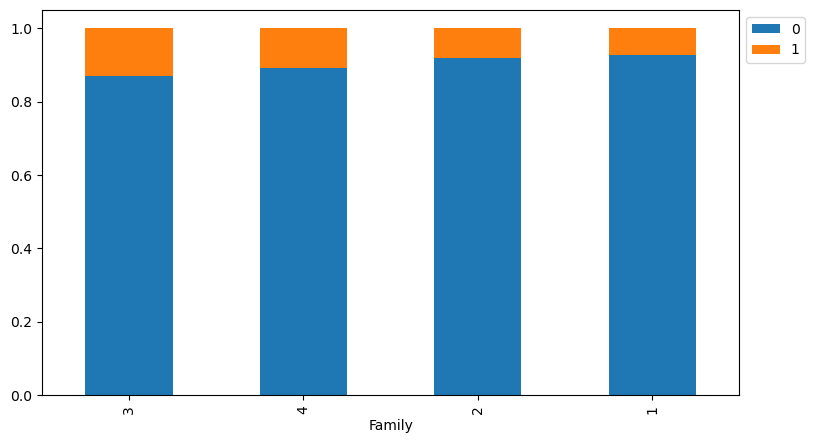

<IPython.core.display.Javascript object>

In [43]:
stacked_barplot(loan, "Family", "Personal_Loan")

* Family with 4 and 3 members took more personal loans

#### Target Variable Personal Loan vs Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


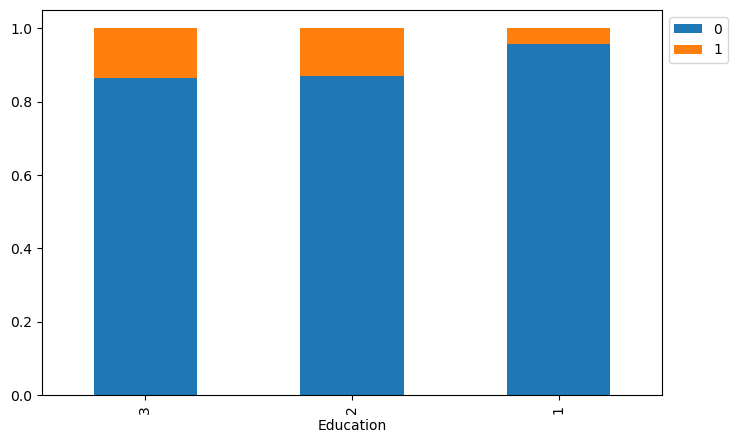

<IPython.core.display.Javascript object>

In [44]:
stacked_barplot(loan, "Education", "Personal_Loan")

* Customers who are undergrads did not take personal loans as much as compared with customers who are graduates and have advanced degrees

#### Target Variable Personal Loan vs Securities Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


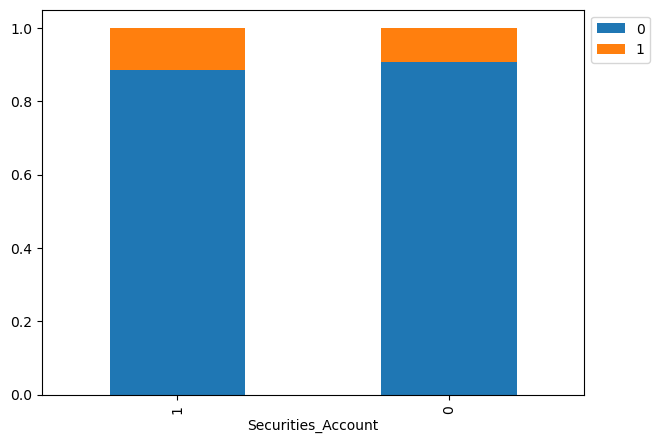

<IPython.core.display.Javascript object>

In [45]:
stacked_barplot(loan, "Securities_Account", "Personal_Loan")

* Based on the data, customers with securities account, are more likely to take personal loan

#### Target Variable Personal Loan vs Certificate of Deposit

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


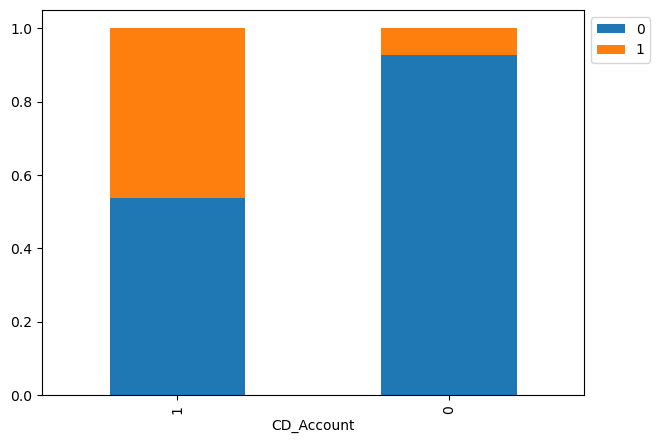

<IPython.core.display.Javascript object>

In [46]:
stacked_barplot(loan, "CD_Account", "Personal_Loan")

* Based on the data, customers with certificate of deposit account, are more likely to take personal loan

#### Target Variable Personal Loan vs Online Customers

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


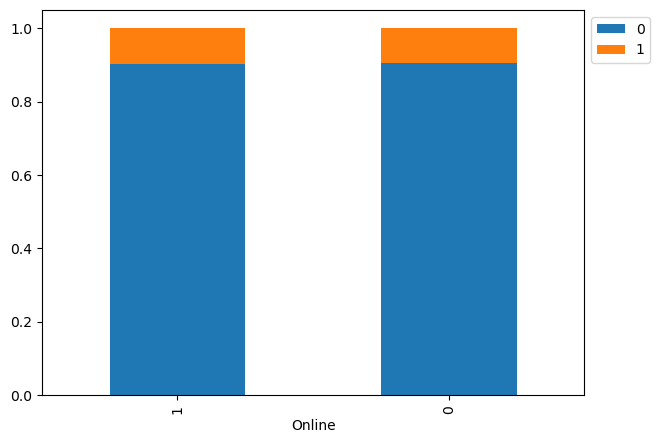

<IPython.core.display.Javascript object>

In [47]:
stacked_barplot(loan, "Online", "Personal_Loan")

* There is not much difference if the customer is online on their personal loan

#### Target Variable Personal Loan vs Credit Card

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


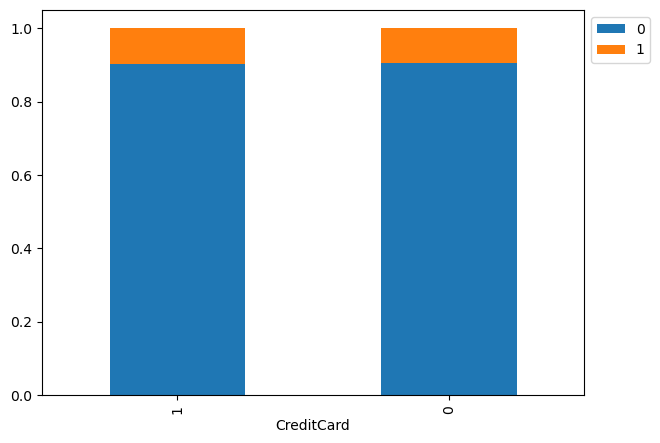

<IPython.core.display.Javascript object>

In [48]:
stacked_barplot(loan, "CreditCard", "Personal_Loan")

* There is not much difference if the customer is using other Bank's credit card on personal loan

#### Target Variable Personal Loan vs County

Personal_Loan              0    1   All
County                                 
All                     4520  480  5000
Los Angeles County       984  111  1095
Santa Clara County       492   71   563
San Diego County         509   59   568
Alameda County           456   44   500
Orange County            309   30   339
San Francisco County     238   19   257
Monterey County          113   15   128
Sacramento County        169   15   184
Contra Costa County       73   12    85
San Mateo County         192   12   204
Ventura County           103   11   114
Santa Barbara County     143   11   154
Yolo County              122    8   130
Santa Cruz County         60    8    68
Kern County               47    7    54
Sonoma County             22    6    28
Marin County              48    6    54
Riverside County          50    6    56
San Luis Obispo County    28    5    33
Shasta County             15    3    18
unknown                   31    3    34
Solano County             30    3    33


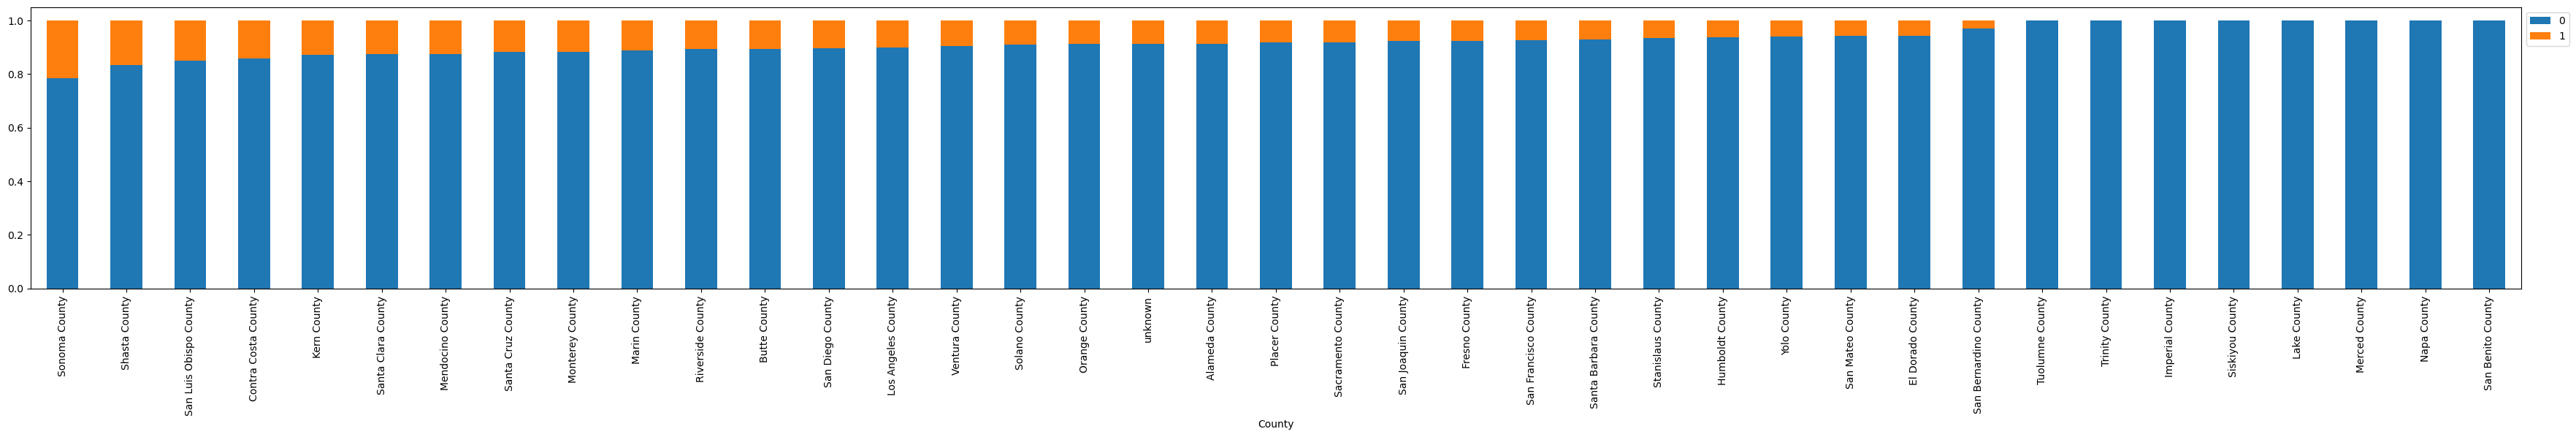

<IPython.core.display.Javascript object>

In [49]:
stacked_barplot(loan, "County", "Personal_Loan")

* As seen previously - Almost 61.3% of customers belong to top 5 counties (Los Angeles County, San Diego County, Santa Clara County, Alameda County and Orange County)
* From the plot, Sonoma county have higher %age of customers who took personal loan, but Sonoma has only 22 customers, followed by Shasta County, who show higher %age of customers who took personal loan, but Shasta has only 15 customers.  

#### Target Variable vs Age

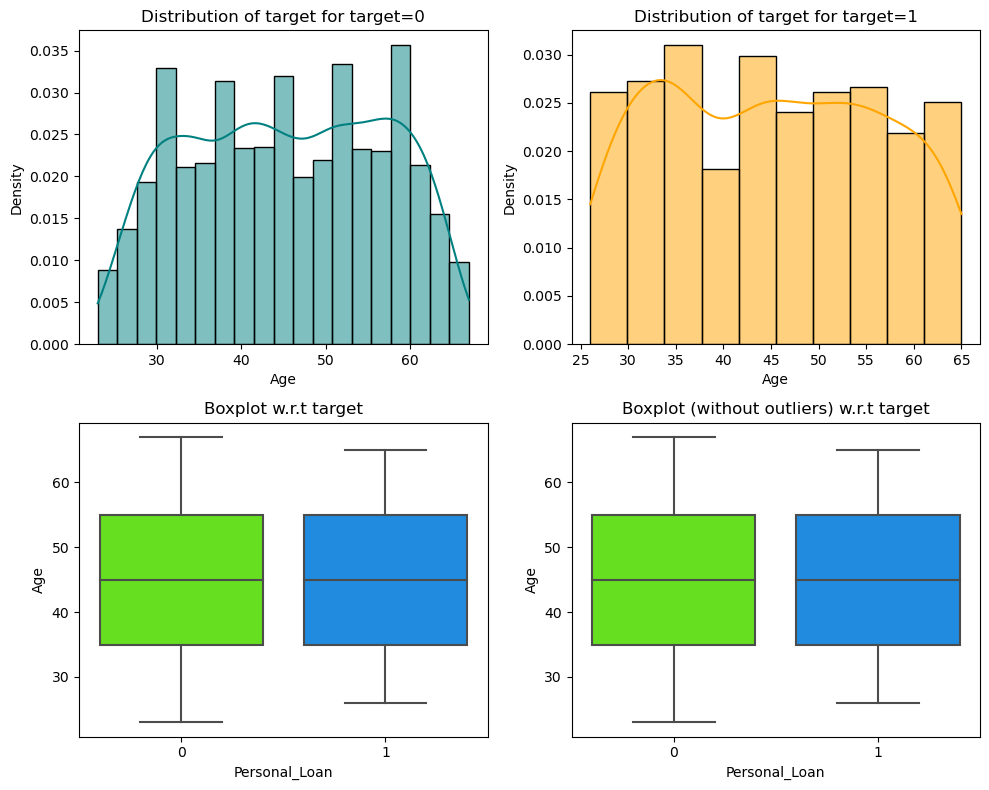

<IPython.core.display.Javascript object>

In [50]:
distribution_plot_wrt_target(loan, "Age", "Personal_Loan")

* Range of Age is smaller for customers who took personal loan

#### Target Variable vs Experience

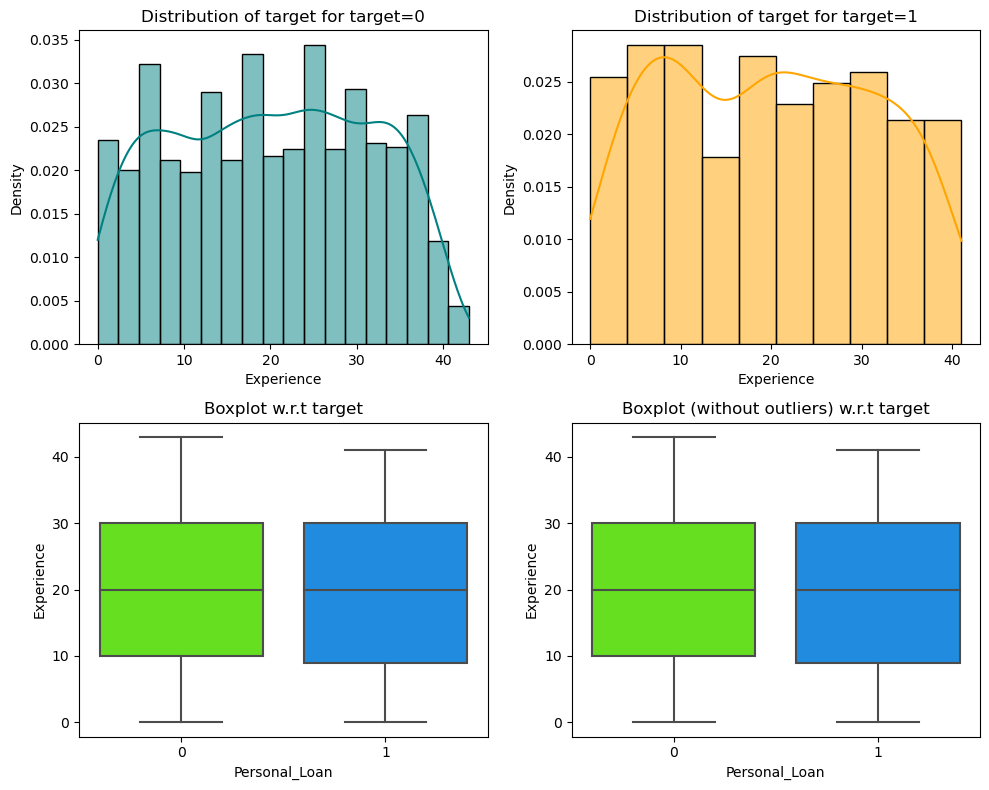

<IPython.core.display.Javascript object>

In [51]:
distribution_plot_wrt_target(loan, "Experience", "Personal_Loan")

* Range of Experience is smaller for customers who took personal loan

#### Target Variable vs Income

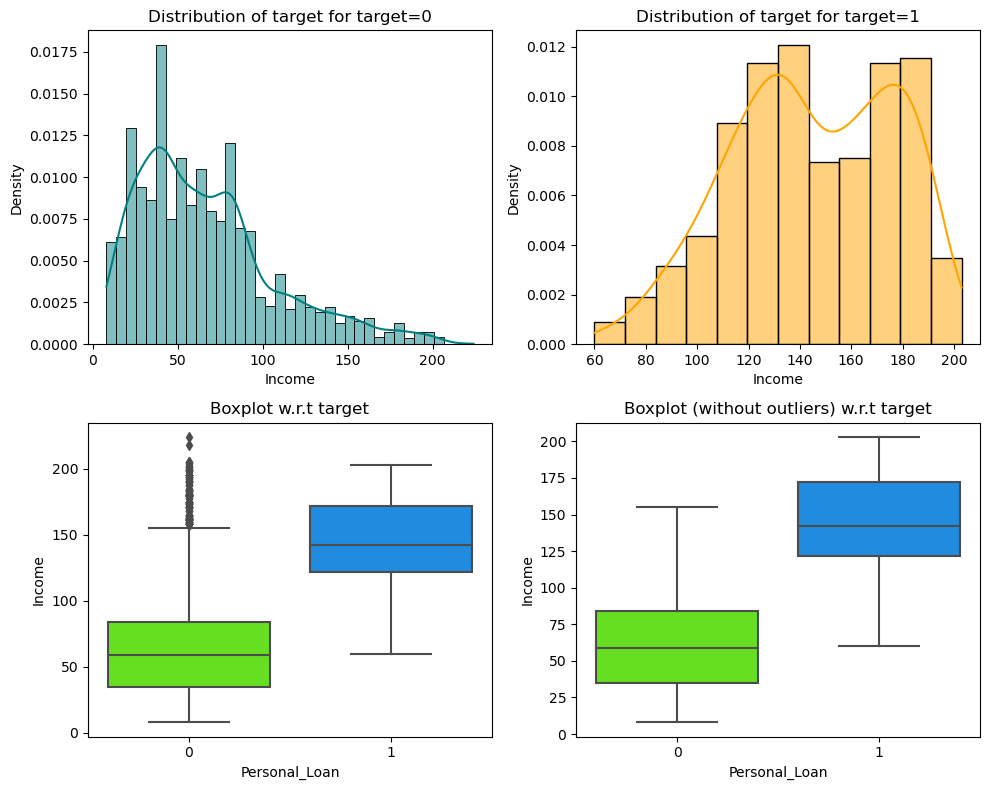

<IPython.core.display.Javascript object>

In [52]:
distribution_plot_wrt_target(loan, "Income", "Personal_Loan")

* Higher Income customers took more Personal Loans

#### Target Variable vs Credit Card spent per month

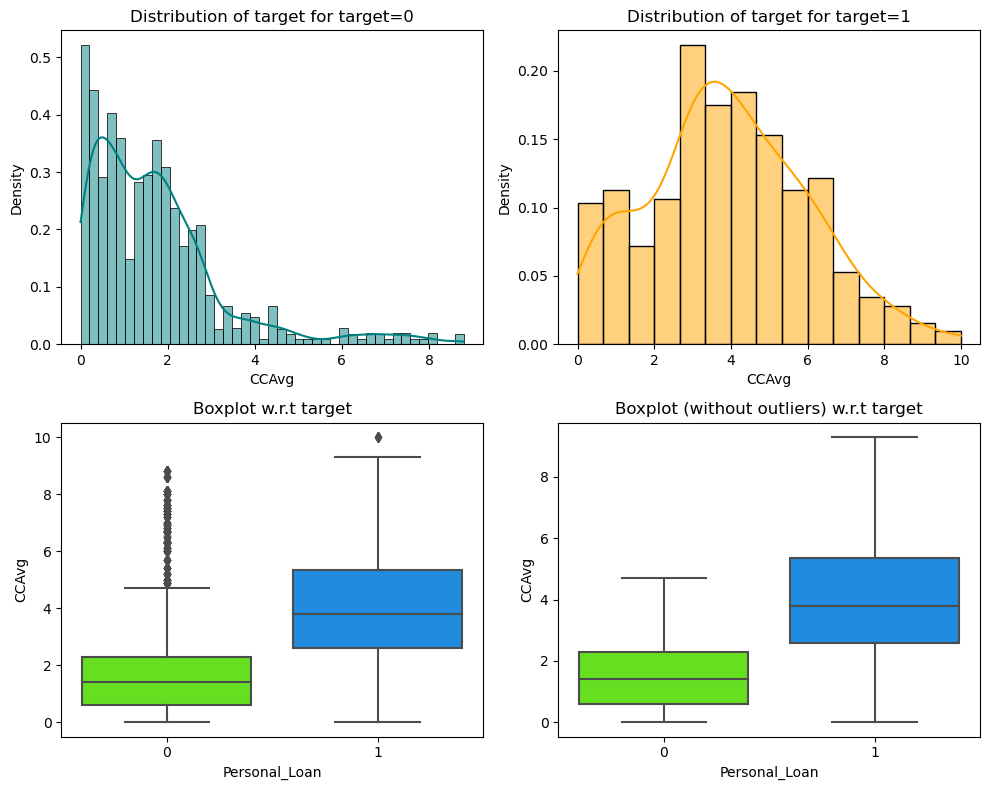

<IPython.core.display.Javascript object>

In [53]:
distribution_plot_wrt_target(loan, "CCAvg", "Personal_Loan")

* High credit card spenders in a month took more Personal Loans

#### Target Variable vs Mortgage

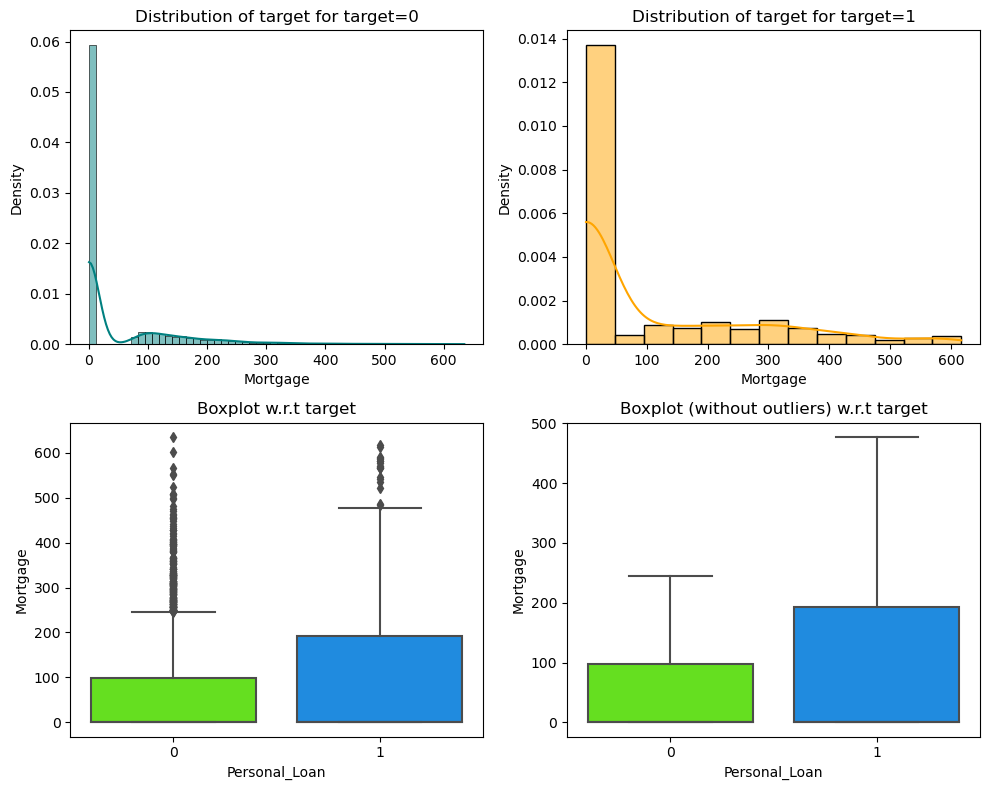

<IPython.core.display.Javascript object>

In [54]:
distribution_plot_wrt_target(loan, "Mortgage", "Personal_Loan")

* Customers who have mortgage took more Personal Loans

#### relations between different continuous variables

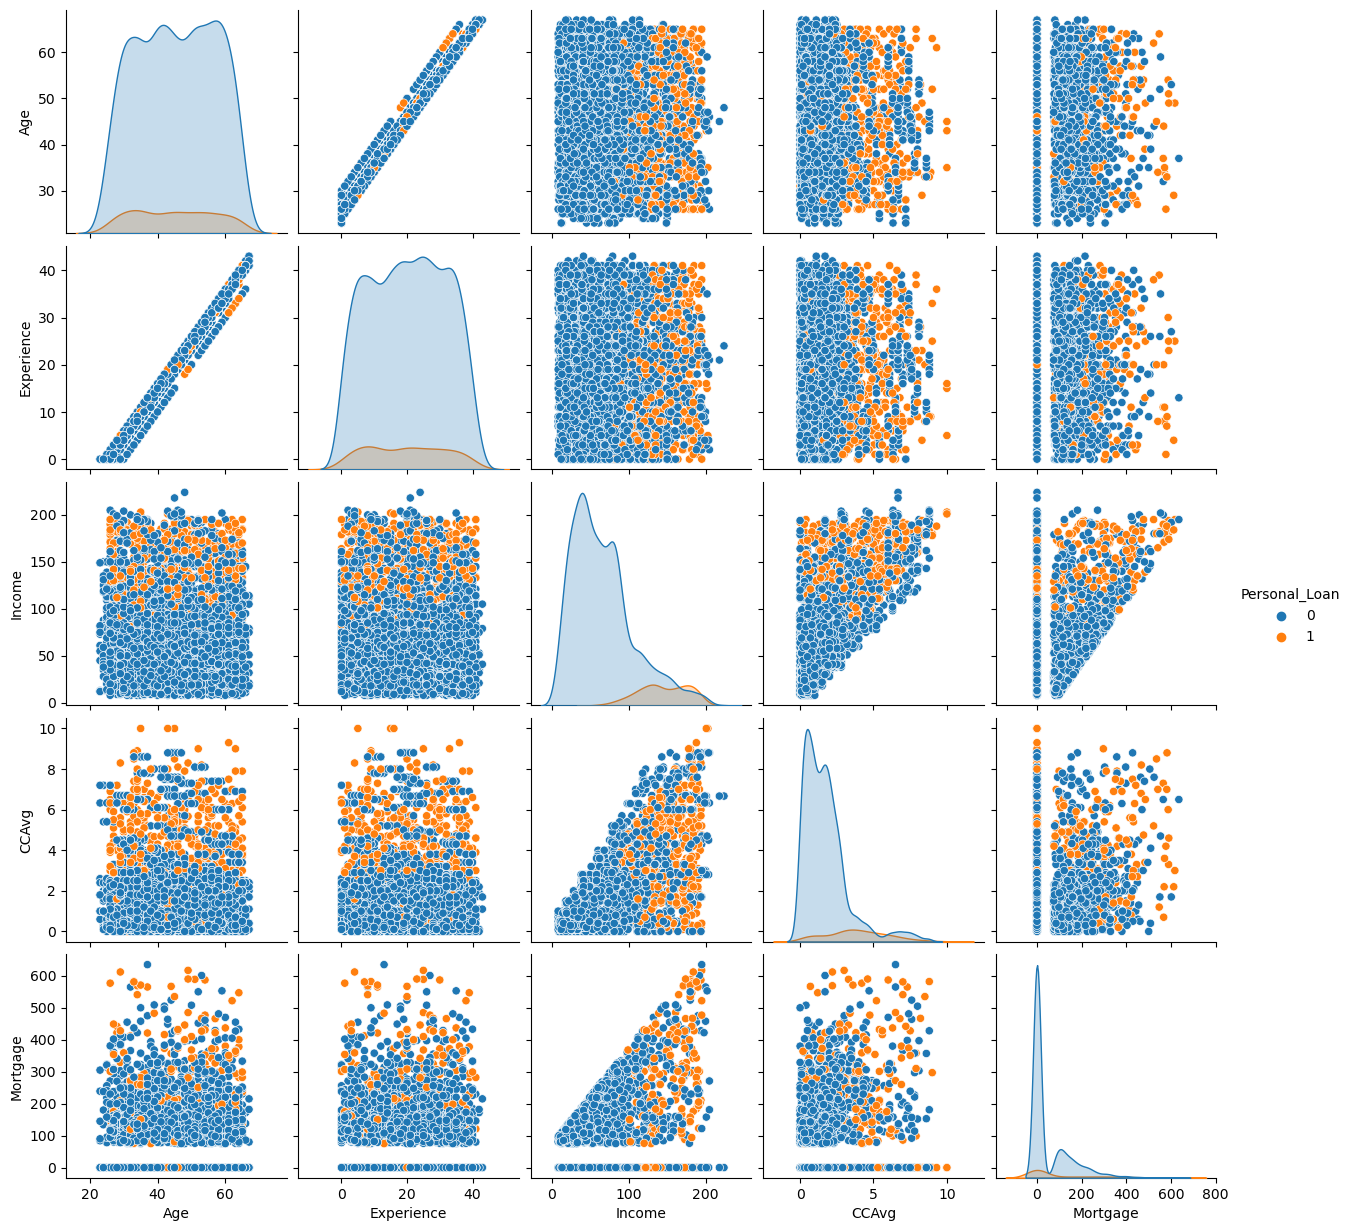

<IPython.core.display.Javascript object>

In [55]:
sns.pairplot(
    data=loan,
    vars=["Age", "Experience", "Income", "CCAvg", "Mortgage"],
    hue="Personal_Loan",
)

* Higher the income and Credit card usage, greater chance of personal loan
* There is positive coorelation between Experience and Age, Income and Mortgage, Income and Credit card usage

### Data PreProcessing

In [56]:
# Convert Family, Education, Personal_Loan, Securities_Account, CD_Account, Online,
# CreditCard into category based on information provided

loan["Family"] = loan["Family"].astype("category")
loan["Education"] = loan["Education"].astype("category")
loan["Personal_Loan"] = loan["Personal_Loan"].astype("category")
loan["Securities_Account"] = loan["Securities_Account"].astype("category")
loan["CD_Account"] = loan["CD_Account"].astype("category")
loan["Online"] = loan["Online"].astype("category")
loan["CreditCard"] = loan["CreditCard"].astype("category")
loan["County"] = loan["County"].astype("category")

<IPython.core.display.Javascript object>

#### Outlier Detection using boxplot

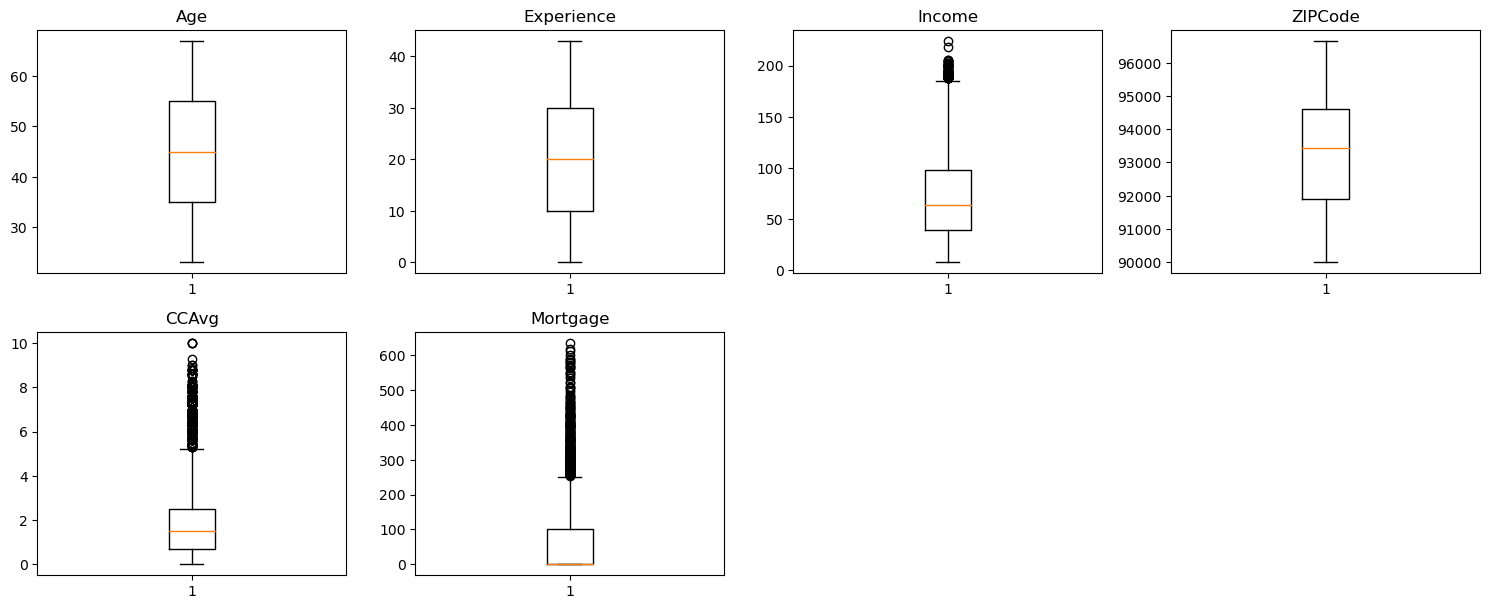

<IPython.core.display.Javascript object>

In [57]:
num_cols = loan.columns[loan.dtypes != "category"]

plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(loan[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Age and Experience do not have any outliers
* Income, Credit Card Avg and Mortgage have outliers at the higher side

In [58]:
# lets find %age of outliers
Q1 = loan[num_cols].quantile(0.25)
Q3 = loan[num_cols].quantile(0.75)

IQR = Q3 - Q1

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Percentage of outliers in each column
(
    (loan[num_cols] < lower_whisker) | (loan[num_cols] > upper_whisker)
).sum() / loan.shape[0] * 100

Age           0.00
Experience    0.00
Income        1.92
ZIPCode       0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

<IPython.core.display.Javascript object>

* Credit card average per month and Mortgage have higher %age of outliers, but they seems fine looking at numbers (from describe())

### Split Data

In [59]:
X = loan.drop(
    ["Personal_Loan", "ZIPCode", "County"], axis=1
)  # we will not use ZIPCode and County for our analysis

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

y = loan["Personal_Loan"]

<IPython.core.display.Javascript object>

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [61]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


<IPython.core.display.Javascript object>

In [62]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

### Model Building - Logistic Regression

In [63]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    acc = accuracy_score(target, model.predict(predictors))  # to compute Accuracy
    recall = recall_score(target, model.predict(predictors))  # to compute Recall
    precision = precision_score(
        target, model.predict(predictors)
    )  # to compute Precision
    f1 = f1_score(target, model.predict(predictors))  # to compute F1-score
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )
    return df_perf

<IPython.core.display.Javascript object>

In [64]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    cm = confusion_matrix(target, model.predict(predictors))

    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

#### Logistic Regression using liblinear

In [65]:
# fit the model on training data
lg = LogisticRegression(solver="liblinear", random_state=1)
lg.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

<IPython.core.display.Javascript object>

#### Finding the coefficients and its interpretation

In [66]:
pd.DataFrame(lg.coef_[0], X_train.columns, columns=["coeff"]).T

Age  Experience    Income    CCAvg  Mortgage  Family_2  Family_3  \
coeff -0.365658    0.365398  0.053617  0.20518  0.000835 -0.191639  1.997865   

       Family_4  Education_2  Education_3  Securities_Account_1  CD_Account_1  \
coeff  1.288917     3.214271     3.510861             -0.802701      2.994967   

       Online_1  CreditCard_1  
coeff -0.512042     -0.819827

<IPython.core.display.Javascript object>

* Coefficients of Experience, Income, CC Average, Mortgage, Family of 3 and 4, higher education, Certificate of deposit are positive, an increase in these will lead to an increase in chances of a customer taking personal loan
* Coefficients of Age, Family of 2, securities account holder, online banking, other bank credit card are negative, an increase in these will lead to a decrease in chances of a customer taking personal loan

In [67]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# %age change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

Age  Experience    Income      CCAvg  Mortgage   Family_2  \
Odds          0.693740    1.441088  1.055080   1.227746  1.000835   0.825605   
Change_odd% -30.626028   44.108756  5.508005  22.774581  0.083535 -17.439487   

               Family_3    Family_4  Education_2  Education_3  \
Odds           7.373295    3.628855    24.885135    33.477082   
Change_odd%  637.329526  262.885460  2388.513455  3247.708150   

             Securities_Account_1  CD_Account_1   Online_1  CreditCard_1  
Odds                     0.448117     19.984694   0.599270      0.440508  
Change_odd%            -55.188281   1898.469373 -40.072961    -55.949223

<IPython.core.display.Javascript object>

* Age: Holding all other features constant, a unit change in Age will decrease the odds of a customer taking personal loan by 0.69 times or 30.62% decrease in the odds 
* Experience: Holding all other features constant, a unit change in Experience will increase the odds of a customer taking personal loan by 1.44 times or 44.1% increase in odds
* Income: Holding all other features constant, a unit change in Income will increase the odds of a customer taking personal loan by 1.05 or 5.5% increase in the odds
* CCAvg: Holding all other features constant, a unit change in CC Avg will increase the odds of a customer taking personal loan by 1.22 times or 22.77% increase in the odds. 
* Mortgage: Holding all other features constant, a unit change in Mortgage will increase the odds of a customer taking personal loan by 1 times or 0.08% increase in odds. 

#### Model Performance

Training Metrics
   Accuracy    Recall  Precision        F1
0  0.960286  0.679758   0.872093  0.764007


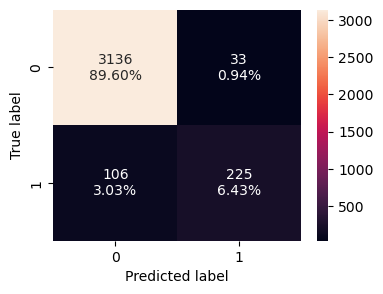

<IPython.core.display.Javascript object>

In [68]:
print("Training Metrics")
log_reg_model_class_train_perf = model_performance_classification_sklearn(
    lg, X_train, y_train
)
print(log_reg_model_class_train_perf)
confusion_matrix_sklearn(lg, X_train, y_train)

Testing Metrics
   Accuracy    Recall  Precision        F1
0  0.952667  0.597315       0.89  0.714859


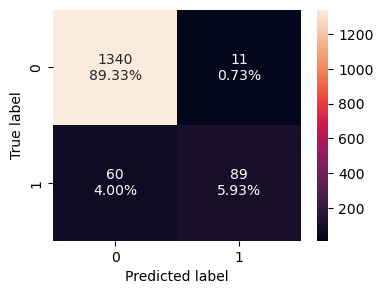

<IPython.core.display.Javascript object>

In [69]:
print("Testing Metrics")
log_reg_model_class_test_perf = model_performance_classification_sklearn(
    lg, X_test, y_test
)
print(log_reg_model_class_test_perf)
confusion_matrix_sklearn(lg, X_test, y_test)

* Accurancy, Recall, Precision and F1 are pretty comparable for both training and test sets

### ROC-AUC

functions to print performance metrics and confusion metrics using threshold

In [70]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )
    return df_perf

<IPython.core.display.Javascript object>

In [71]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

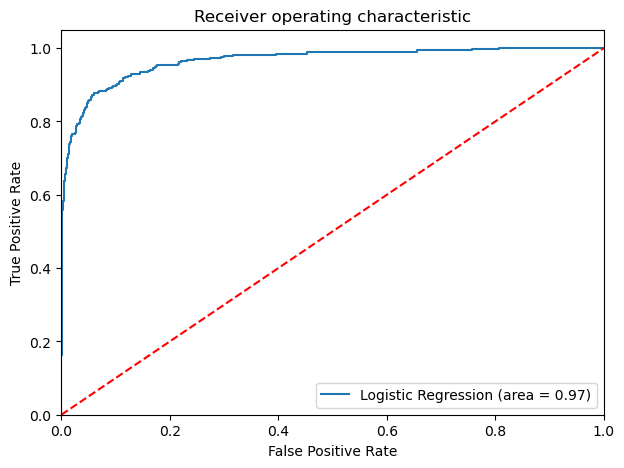

<IPython.core.display.Javascript object>

In [72]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [73]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.16135024914537402


<IPython.core.display.Javascript object>

Training Confusion Matrix


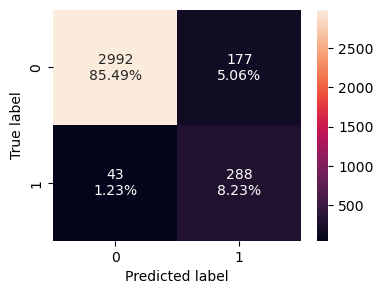

<IPython.core.display.Javascript object>

In [74]:
# creating confusion matrix
print("Training Confusion Matrix")
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [75]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_train, y_train, threshold=optimal_threshold_auc_roc
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.937143  0.870091   0.619355  0.723618

<IPython.core.display.Javascript object>

Testing Confusion Matrix


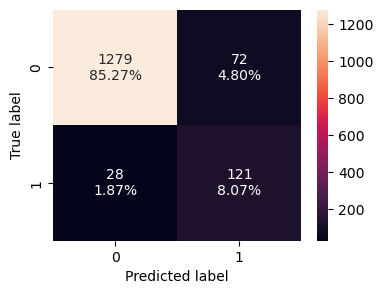

<IPython.core.display.Javascript object>

In [76]:
# creating confusion matrix
print("Testing Confusion Matrix")
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [77]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_test, y_test, threshold=optimal_threshold_auc_roc
    )
)
print("Testing performance:")
log_reg_model_test_perf_threshold_auc_roc

Testing performance:


Accuracy    Recall  Precision        F1
0  0.933333  0.812081   0.626943  0.707602

<IPython.core.display.Javascript object>

#### Use Precision-Recall curve to see if we can get better threshold

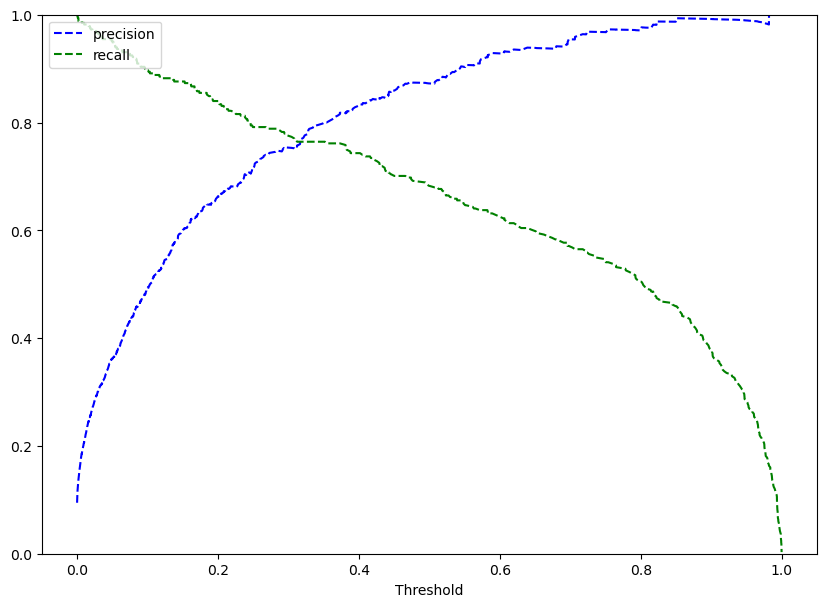

<IPython.core.display.Javascript object>

In [78]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

use threshold around 0.35 and check the recall/precision for both training and testing data

Training Confusion Matrix


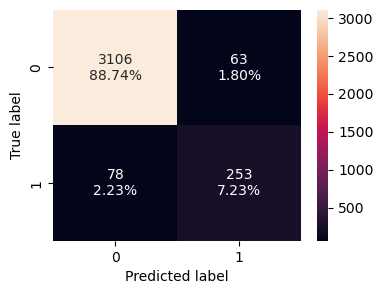

<IPython.core.display.Javascript object>

In [79]:
# creating confusion matrix
print("Training Confusion Matrix")
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train, threshold=0.35)

In [80]:
# checking model performance for this model
log_reg_model_train_perf_threshold_curve = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_train, y_train, threshold=0.35
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy   Recall  Precision        F1
0  0.959714  0.76435   0.800633  0.782071

<IPython.core.display.Javascript object>

Testing Confusion Matrix


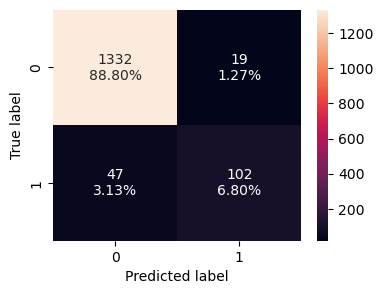

<IPython.core.display.Javascript object>

In [81]:
# creating confusion matrix
print("Testing Confusion Matrix")
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test, threshold=0.35)

In [82]:
# checking model performance for this model
log_reg_model_test_perf_threshold_curve = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_test, y_test, threshold=0.35
    )
)
print("Testing performance:")
log_reg_model_test_perf_threshold_curve

Testing performance:


Accuracy    Recall  Precision        F1
0     0.956  0.684564   0.842975  0.755556

<IPython.core.display.Javascript object>

use threshold around 0.30 and check the recall/precision for both training and testing data

Training Confusion Matrix


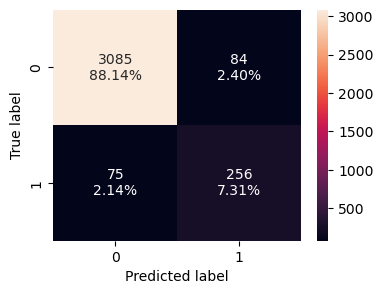

<IPython.core.display.Javascript object>

In [83]:
# creating confusion matrix
print("Training Confusion Matrix")
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train, threshold=0.3)

In [84]:
# checking model performance for this model
log_reg_model_train_perf_threshold_curve_30 = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_train, y_train, threshold=0.3
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve_30

Training performance:


Accuracy    Recall  Precision       F1
0  0.954571  0.773414   0.752941  0.76304

<IPython.core.display.Javascript object>

Testing Confusion Matrix


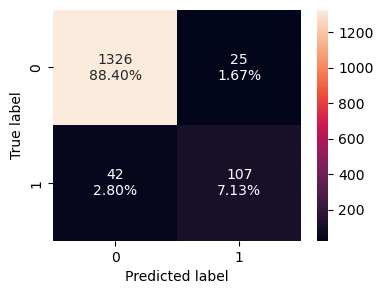

<IPython.core.display.Javascript object>

In [85]:
# creating confusion matrix
print("Testing Confusion Matrix")
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test, threshold=0.3)

In [86]:
# checking model performance for this model
log_reg_model_test_perf_threshold_curve_30 = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_test, y_test, threshold=0.3
    )
)
print("Testing performance:")
log_reg_model_test_perf_threshold_curve_30

Testing performance:


Accuracy    Recall  Precision        F1
0  0.955333  0.718121   0.810606  0.761566

<IPython.core.display.Javascript object>

### Logistic Regression - Model Performance Summary

In [87]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_class_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
        log_reg_model_train_perf_threshold_curve_30.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Class",
    "Logistic Regression-Auc_Roc",
    "Logistic Regression-Threshold_35",
    "Logistic Regression-Threshold_30",
]

print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


Accuracy    Recall  Precision        F1
Logistic Regression Class         0.960286  0.679758   0.872093  0.764007
Logistic Regression-Auc_Roc       0.937143  0.870091   0.619355  0.723618
Logistic Regression-Threshold_35  0.959714  0.764350   0.800633  0.782071
Logistic Regression-Threshold_30  0.954571  0.773414   0.752941  0.763040

<IPython.core.display.Javascript object>

In [88]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_class_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
        log_reg_model_test_perf_threshold_curve_30.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression Class",
    "Logistic Regression-Auc_Roc",
    "Logistic Regression-Threshold_35",
    "Logistic Regression-Threshold_30",
]

print("Testing performance comparison:")
models_test_comp_df.T

Testing performance comparison:


Accuracy    Recall  Precision        F1
Logistic Regression Class         0.952667  0.597315   0.890000  0.714859
Logistic Regression-Auc_Roc       0.933333  0.812081   0.626943  0.707602
Logistic Regression-Threshold_35  0.956000  0.684564   0.842975  0.755556
Logistic Regression-Threshold_30  0.955333  0.718121   0.810606  0.761566

<IPython.core.display.Javascript object>

### Data split for Decision Tree

spliting the data again, as we don't want to create dummy variables for decision tree

In [89]:
X = loan.drop(
    ["Personal_Loan", "ZIPCode", "County"], axis=1
)  # we will not use ZIPCode and County for our analysis
y = loan["Personal_Loan"]

<IPython.core.display.Javascript object>

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [91]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


<IPython.core.display.Javascript object>

In [92]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

In [93]:
# function to compute different metrics to check performance of a classification model


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [94]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Build Decision Tree Model

In [95]:
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Model Performance on Training Data

In [96]:
decision_tree_perf_train = model_performance_classification_sklearn(
    dTree, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

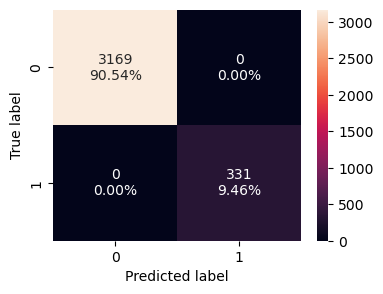

<IPython.core.display.Javascript object>

In [97]:
confusion_matrix_sklearn(dTree, X_train, y_train)

#### Model Performance on Testing Data

In [98]:
decision_tree_perf_test = model_performance_classification_sklearn(
    dTree, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0      0.98  0.885906   0.910345  0.897959

<IPython.core.display.Javascript object>

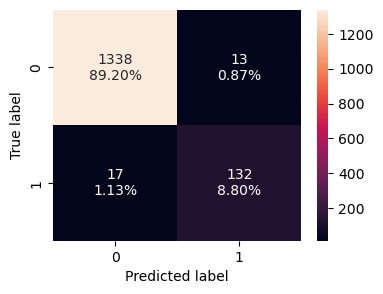

<IPython.core.display.Javascript object>

In [99]:
confusion_matrix_sklearn(dTree, X_test, y_test)

#### Visualizing Decision Tree Model

In [100]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


<IPython.core.display.Javascript object>

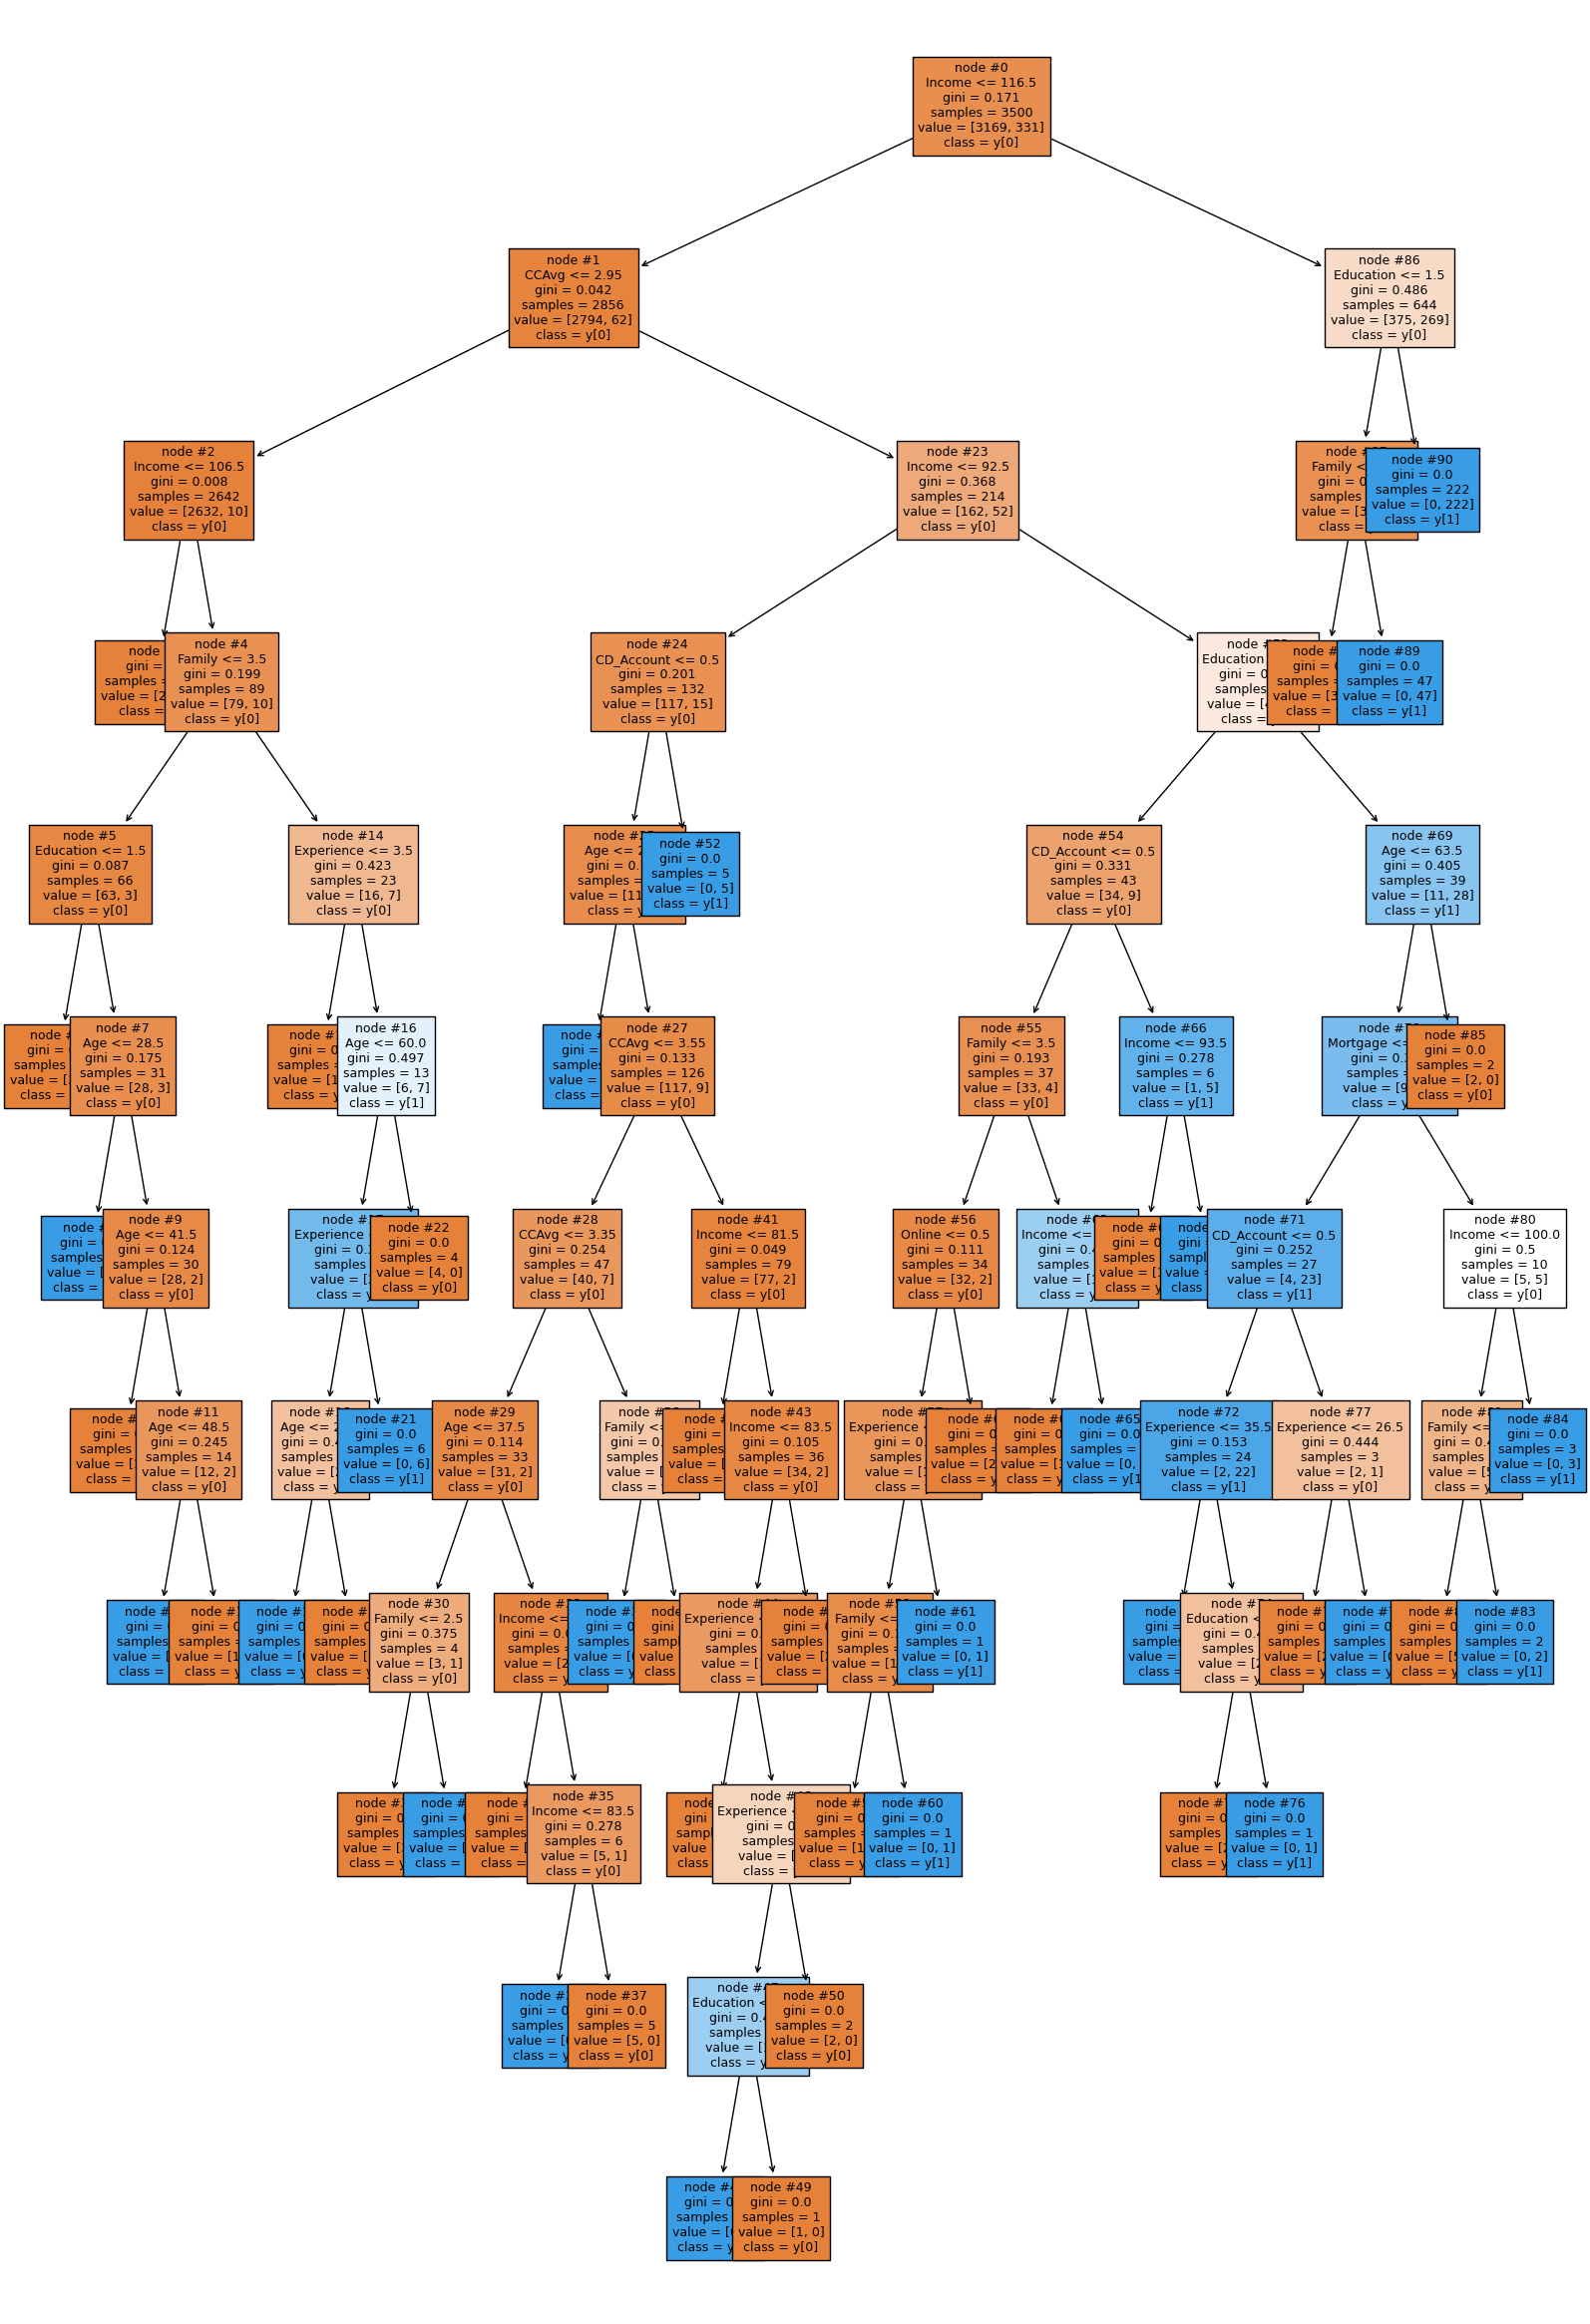

<IPython.core.display.Javascript object>

In [101]:
plt.figure(figsize=(20, 30))
tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [102]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [35.00, 0.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Age <= 41.50
|   |   |   |   |   |   |   |--- weights: [16.00, 0.00] class: 0
|   |   |   |   |   |   |--- Age >  41.50
|   |   |   |   |   |   |   |--- Age <= 48.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |--- Age >  48.50
|   |   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |--- Experience > 

<IPython.core.display.Javascript object>

In [103]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dTree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Education           0.405914
Income              0.310561
Family              0.167646
CCAvg               0.042183
CD_Account          0.025711
Age                 0.023880
Experience          0.020528
Mortgage            0.003014
Online              0.000561
Securities_Account  0.000000
CreditCard          0.000000


<IPython.core.display.Javascript object>

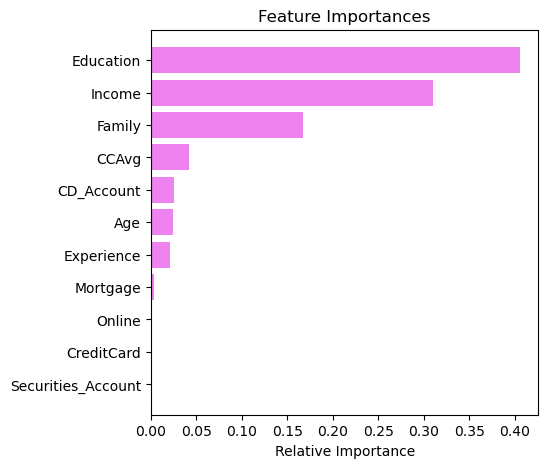

<IPython.core.display.Javascript object>

In [104]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(5, 5))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, Education, Income, Family are three most important varable for predicting if the customer will take personal loan

### Build Decision Tree Model using GridSearch for Hyperparameter tuning

In [105]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"max_depth": np.arange(1, 10)}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=1)

<IPython.core.display.Javascript object>

In [106]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.994571  0.954683     0.9875  0.970814

<IPython.core.display.Javascript object>

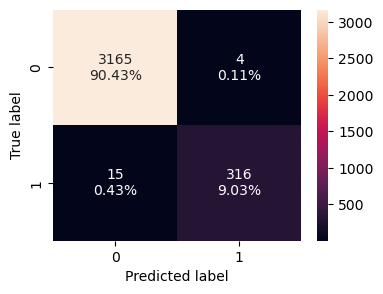

<IPython.core.display.Javascript object>

In [107]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [108]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.980667  0.872483   0.928571  0.899654

<IPython.core.display.Javascript object>

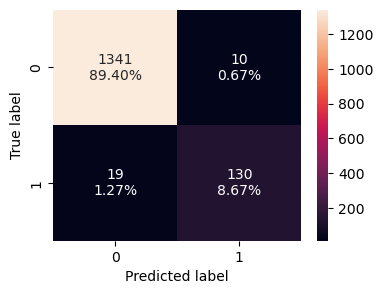

<IPython.core.display.Javascript object>

In [109]:
confusion_matrix_sklearn(estimator, X_test, y_test)

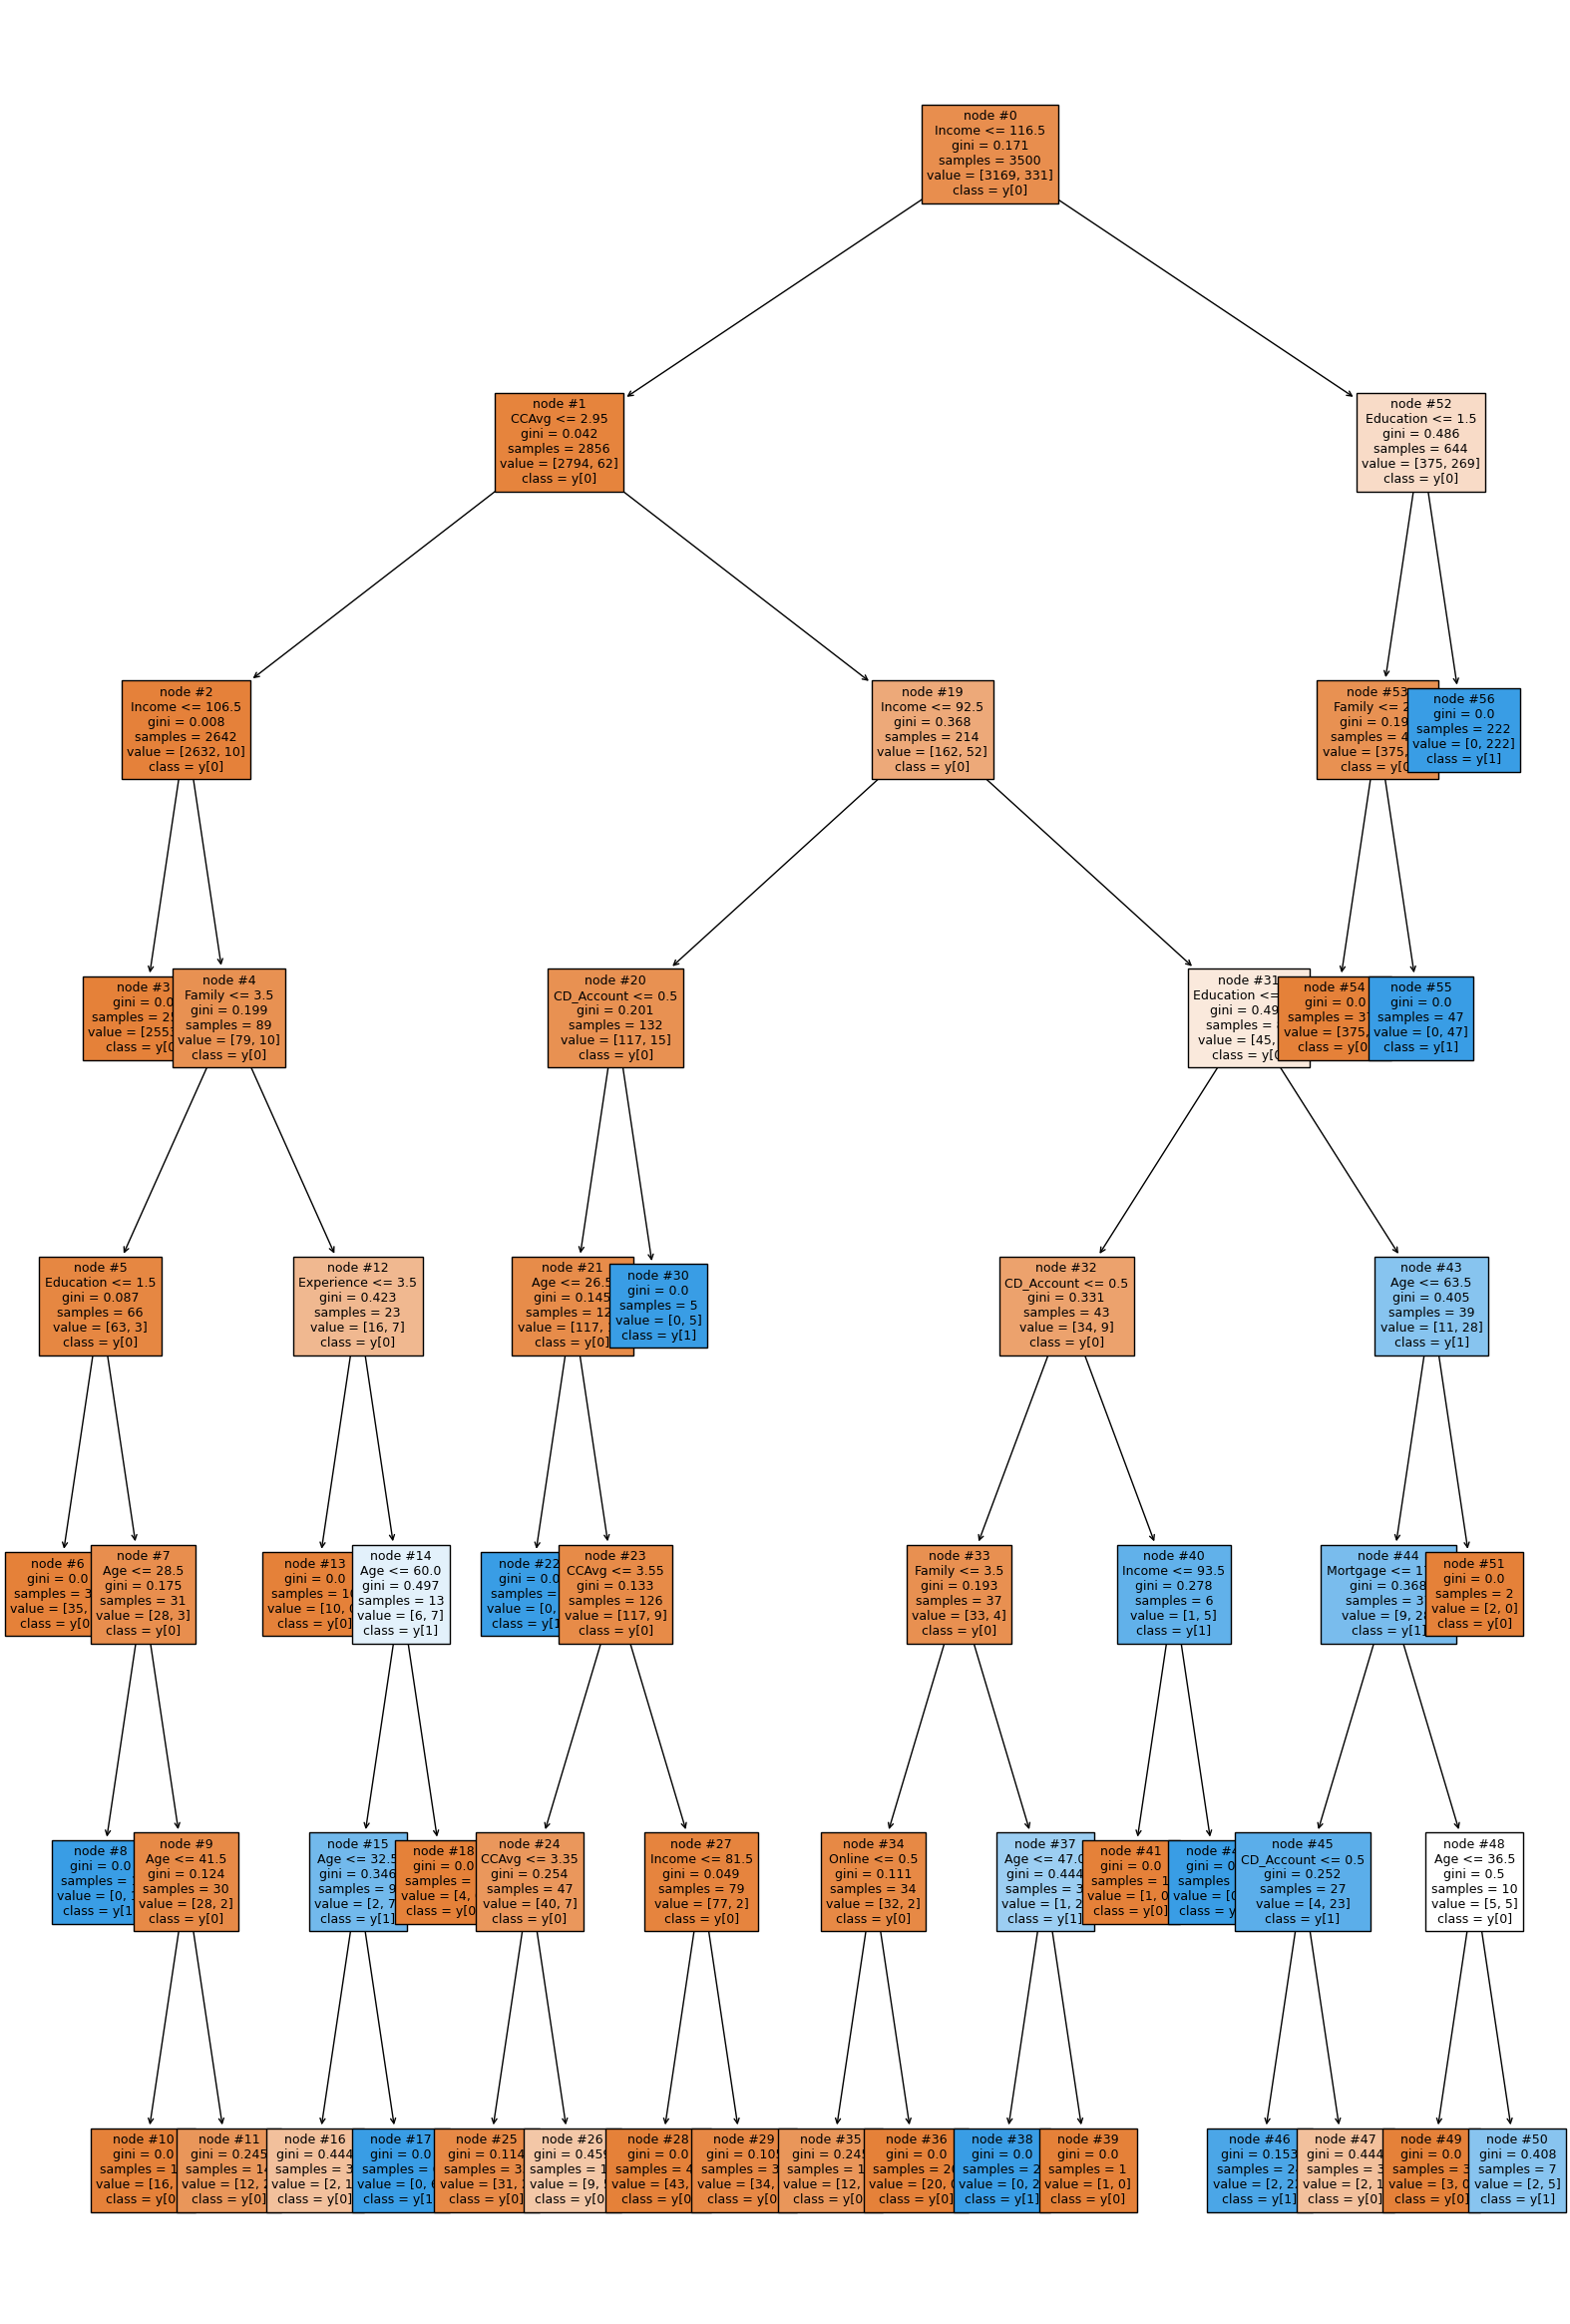

<IPython.core.display.Javascript object>

In [110]:
plt.figure(figsize=(20, 30))
tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [111]:
# importance
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Education           0.422626
Income              0.316653
Family              0.154298
CCAvg               0.044406
CD_Account          0.027067
Age                 0.025430
Experience          0.005756
Mortgage            0.003173
Online              0.000590
Securities_Account  0.000000
CreditCard          0.000000


<IPython.core.display.Javascript object>

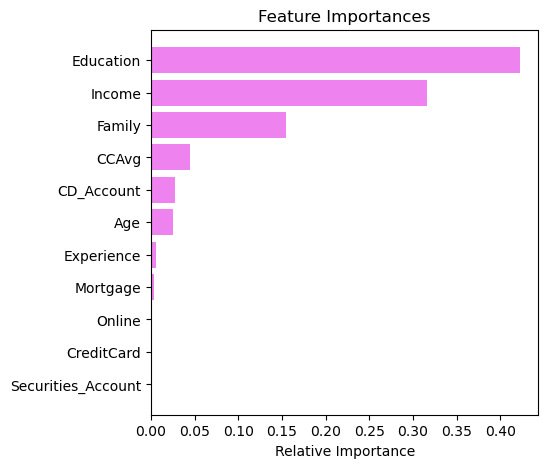

<IPython.core.display.Javascript object>

In [112]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(5, 5))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* After applying hyperparameter, decision tree suggests Education, Income and Family are most iportant factors in predicting a customer if they will take personal loan or not

### Cost Complexity Pruning

In [113]:
# get alphas and impurities at east step
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [114]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000223    0.001114
2     0.000268    0.002188
3     0.000359    0.003263
4     0.000381    0.003644
5     0.000381    0.004025
6     0.000381    0.004406
7     0.000381    0.004787
8     0.000409    0.006423
9     0.000476    0.006900
10    0.000508    0.007407
11    0.000582    0.007989
12    0.000593    0.009175
13    0.000641    0.011740
14    0.000769    0.014817
15    0.000792    0.017985
16    0.001552    0.019536
17    0.002333    0.021869
18    0.003024    0.024893
19    0.003294    0.028187
20    0.006473    0.034659
21    0.023866    0.058525
22    0.056365    0.171255

<IPython.core.display.Javascript object>

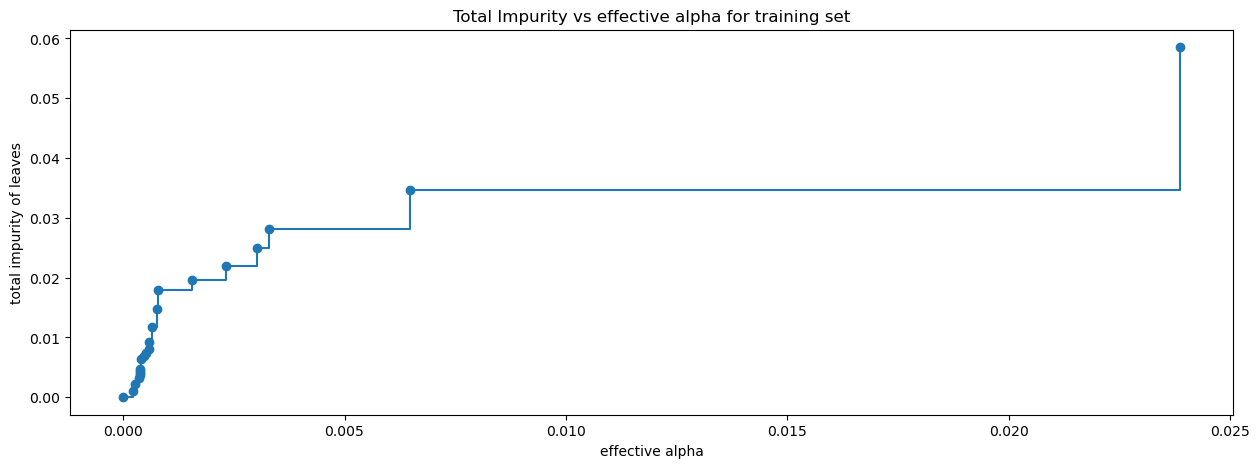

<IPython.core.display.Javascript object>

In [115]:
# plotting effective alpha vs total impurity of leaves
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [116]:
# training the decision tree using effective alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


<IPython.core.display.Javascript object>

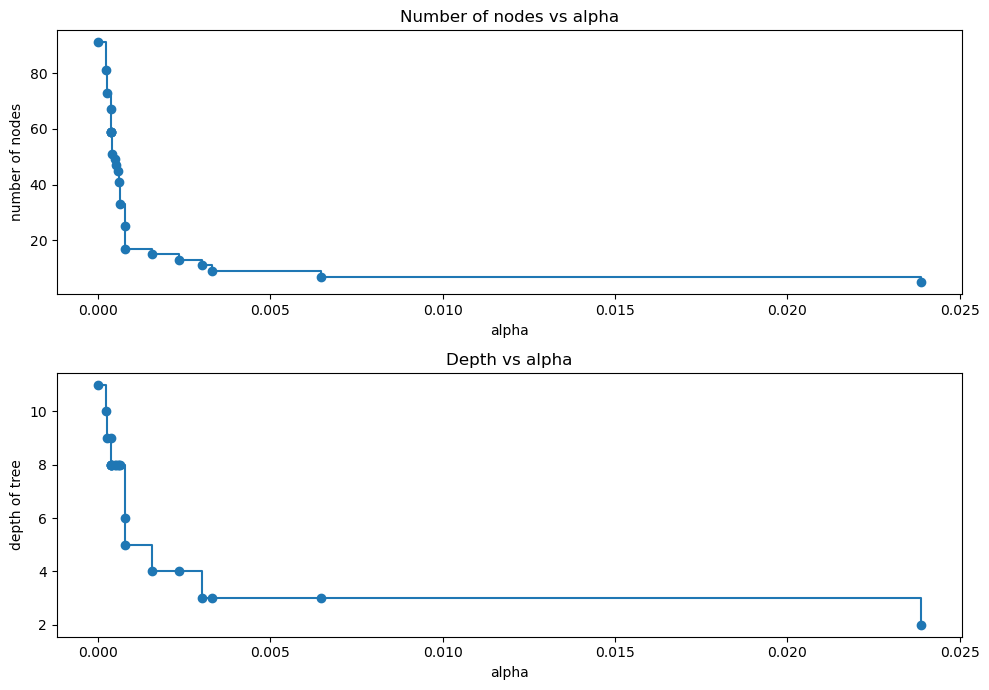

<IPython.core.display.Javascript object>

In [117]:
# we remove the last element in clfs and ccp_alphas as it is trivial tree with only one node.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [118]:
# Accuracy vs alpha for training and testing sets

train_scores = [clf.score(X_train, y_train) for clf in clfs]
print(train_scores)
print()
test_scores = [clf.score(X_test, y_test) for clf in clfs]
print(test_scores)

[1.0, 0.9994285714285714, 0.9988571428571429, 0.9982857142857143, 0.9971428571428571, 0.9971428571428571, 0.9971428571428571, 0.9971428571428571, 0.9962857142857143, 0.996, 0.9957142857142857, 0.9954285714285714, 0.9948571428571429, 0.9928571428571429, 0.9911428571428571, 0.9897142857142858, 0.9885714285714285, 0.9871428571428571, 0.9822857142857143, 0.9822857142857143, 0.9822857142857143, 0.9688571428571429]

[0.98, 0.98, 0.9806666666666667, 0.9813333333333333, 0.9806666666666667, 0.9806666666666667, 0.9806666666666667, 0.9806666666666667, 0.9813333333333333, 0.9813333333333333, 0.9813333333333333, 0.9806666666666667, 0.982, 0.984, 0.9826666666666667, 0.9813333333333333, 0.9813333333333333, 0.98, 0.9753333333333334, 0.9753333333333334, 0.9753333333333334, 0.962]


<IPython.core.display.Javascript object>

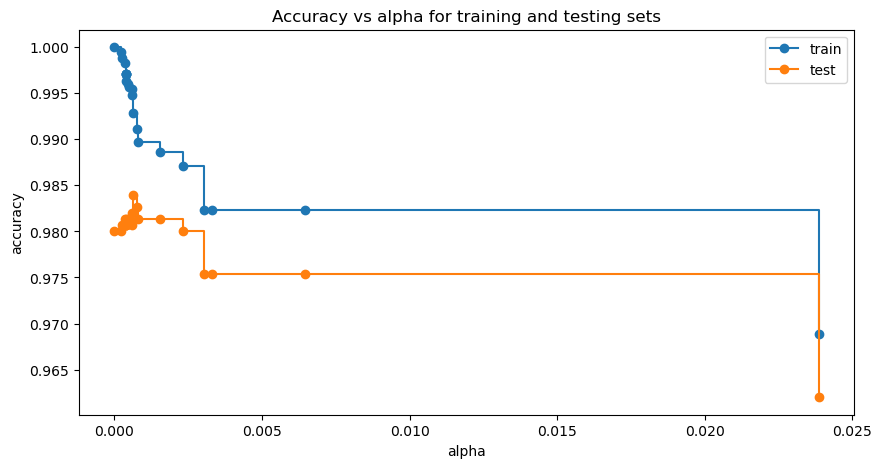

<IPython.core.display.Javascript object>

In [119]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [120]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print("Training accuracy of best model: ", best_model.score(X_train, y_train))
print("Test accuracy of best model: ", best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)
Training accuracy of best model:  0.9928571428571429
Test accuracy of best model:  0.984


<IPython.core.display.Javascript object>

Since accuracy isn't the right metric for our data, we would want high recall

In [121]:
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train3)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [122]:
recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test3)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

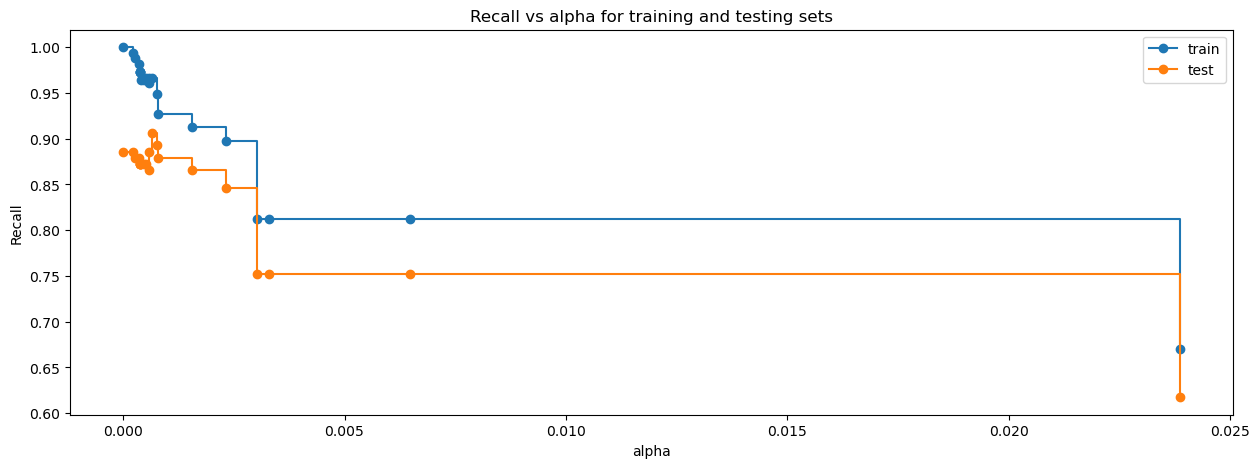

<IPython.core.display.Javascript object>

In [123]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [124]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)


<IPython.core.display.Javascript object>

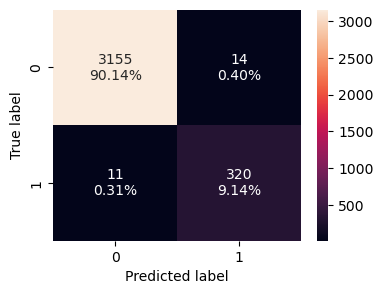

<IPython.core.display.Javascript object>

In [125]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [126]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy    Recall  Precision        F1
0  0.992857  0.966767   0.958084  0.962406

<IPython.core.display.Javascript object>

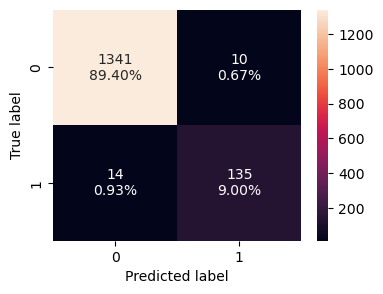

<IPython.core.display.Javascript object>

In [127]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [128]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

Accuracy   Recall  Precision        F1
0     0.984  0.90604   0.931034  0.918367

<IPython.core.display.Javascript object>

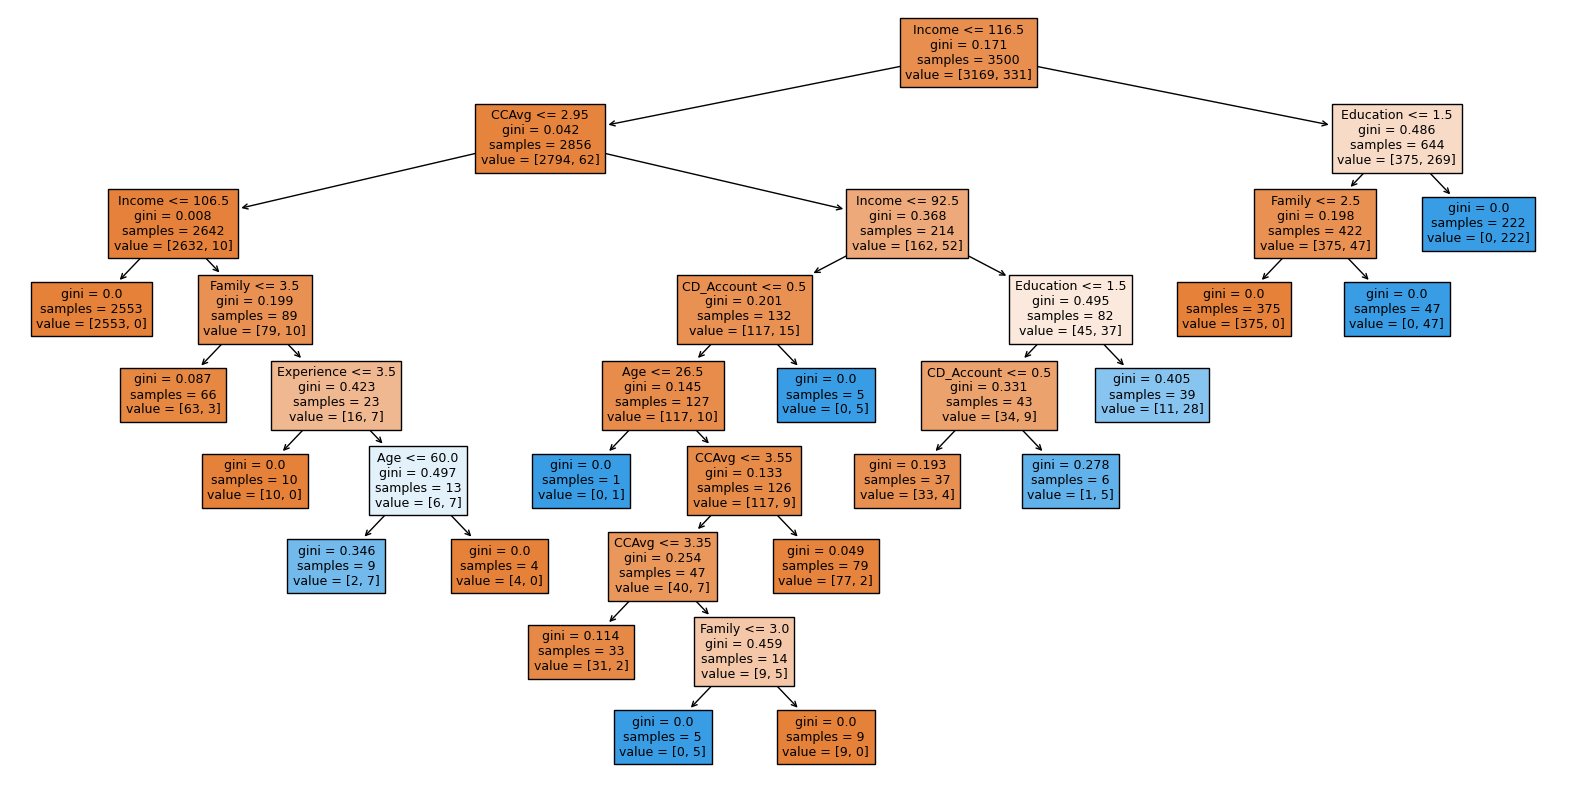

<IPython.core.display.Javascript object>

In [129]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [130]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

<IPython.core.display.Javascript object>

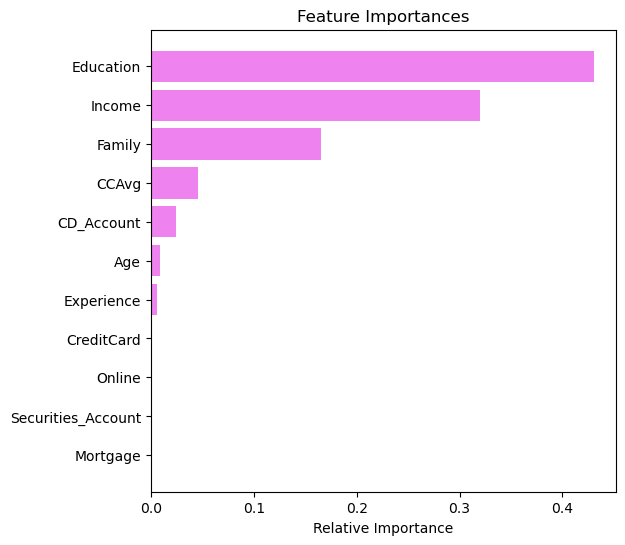

<IPython.core.display.Javascript object>

In [131]:
plt.figure(figsize=(6, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Post pruning also gives Education, Income and Family as most import in deciding if the customer will take personal loan

### Decision Treen - Model Performance Summary

In [132]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree with class",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


Accuracy    Recall  Precision        F1
Decision Tree with class      1.000000  1.000000   1.000000  1.000000
Decision Tree (Pre-Pruning)   0.994571  0.954683   0.987500  0.970814
Decision Tree (Post-Pruning)  0.992857  0.966767   0.958084  0.962406

<IPython.core.display.Javascript object>

In [133]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree with class",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df.T

Test set performance comparison:


Accuracy    Recall  Precision        F1
Decision Tree with class      0.980000  0.885906   0.910345  0.897959
Decision Tree (Pre-Pruning)   0.980667  0.872483   0.928571  0.899654
Decision Tree (Post-Pruning)  0.984000  0.906040   0.931034  0.918367

<IPython.core.display.Javascript object>

### Overall Performance

#### On Training

In [134]:
# training performance comparison

models_train_comp_Overall = pd.concat(
    [
        log_reg_model_class_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
        log_reg_model_train_perf_threshold_curve_30.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_Overall.columns = [
    "Logistic Regression Class",
    "Logistic Regression-Auc_Roc",
    "Logistic Regression-Threshold_35",
    "Logistic Regression-Threshold_30",
    "Decision Tree with class",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_Overall.T

Training performance comparison:


Accuracy    Recall  Precision        F1
Logistic Regression Class         0.960286  0.679758   0.872093  0.764007
Logistic Regression-Auc_Roc       0.937143  0.870091   0.619355  0.723618
Logistic Regression-Threshold_35  0.959714  0.764350   0.800633  0.782071
Logistic Regression-Threshold_30  0.954571  0.773414   0.752941  0.763040
Decision Tree with class          1.000000  1.000000   1.000000  1.000000
Decision Tree (Pre-Pruning)       0.994571  0.954683   0.987500  0.970814
Decision Tree (Post-Pruning)      0.992857  0.966767   0.958084  0.962406

<IPython.core.display.Javascript object>

#### On Testing

In [135]:
# testing performance comparison

models_test_comp_Overall = pd.concat(
    [
        log_reg_model_class_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
        log_reg_model_test_perf_threshold_curve_30.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_Overall.columns = [
    "Logistic Regression Class",
    "Logistic Regression-Auc_Roc",
    "Logistic Regression-Threshold_35",
    "Logistic Regression-Threshold_30",
    "Decision Tree with class",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_Overall.T

Test set performance comparison:


Accuracy    Recall  Precision        F1
Logistic Regression Class         0.952667  0.597315   0.890000  0.714859
Logistic Regression-Auc_Roc       0.933333  0.812081   0.626943  0.707602
Logistic Regression-Threshold_35  0.956000  0.684564   0.842975  0.755556
Logistic Regression-Threshold_30  0.955333  0.718121   0.810606  0.761566
Decision Tree with class          0.980000  0.885906   0.910345  0.897959
Decision Tree (Pre-Pruning)       0.980667  0.872483   0.928571  0.899654
Decision Tree (Post-Pruning)      0.984000  0.906040   0.931034  0.918367

<IPython.core.display.Javascript object>

* Decision tree seems to give better recall, precision and F1 scores
* In the current context, based on the data, Decision Tree with Post Pruning gives best Recall for both training and test data

### Overall Recommendations:
* Key variables which impact personal loan are Education, Income and Family
* Bank should focus on customers with higher education for personal loans (Customers who are undergrads did not take personal loans as much as compared with customers who are graduates and have advanced degrees)
* Bank should focus on giving personal loans for Family with 4 and 3 members
* Bank should target higher Income customers for personal loans
* Bank should target credit card spenders in a month took for personal loans
* Bank should target customers who have mortgages for personal loans
* Bank shoudl target customers with certificate of deposit account for personal loan